In [259]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('../')
import scriptinit
import numpy as np
import numpy.random as npr
import numpy.linalg as npla
from matplotlib.pyplot import *
from pyrl.algorithms.uvfa import *
from pyrl.algorithms.valueiter import *
from pyrl.tasks.gridworld import *
from pyrl.algorithms.nn import *
from pyrl.agents.agent import *
from pyrl.agents.multitask import *
from pyrl.algorithms.multitask import *
import pyrl.agents.arch as arch
from pyrl.prob import *
from pyrl.utils import *
from pyrl.evaluate import *

In [260]:
def showV(v):
    imshow(v.reshape(H, W), interpolation='none')
    plt.axis('off')
#     print v
    
def showIs(learner, task):
    Idict = learner.Idict
    figure()
    Q = np.zeros((H, W))
    for state in Idict:
        val = Idict[state]
        Q[task.env.state_pos[state]] = val
    imshow(Q, interpolation='none')
        
def showExperience(agent):
    task_types = set(agent.experience_task)
    task_percent = dict()
    for task in task_types:
        task_percent[task] = sum([e == task for e in agent.experience_task])
#     total = sum(task_percent.values())
    total = 1.
    return {key: val / float(total) for (key, val) in task_percent.items()}

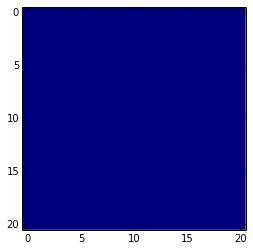

In [261]:
showIs(learner, task)

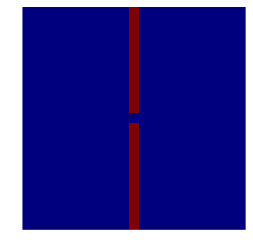

In [262]:
# world 1
H = W = 21
world = np.zeros((H, W))
world[:10, 10] = 1
world[11:, 10] = 1
showV(world)

In [263]:
two_layer_arch = lambda states: arch.two_layer(states, H * W * 2, 32, 4)
grid = Grid(world, action_stoch=0.2)
tol = 1e-6
goal = {(20, 20): 1.}
task = GridWorldUltimateFixedStart(grid.state_id[(0,0)], grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.98)


## Aggregate examples from the target task

In [270]:
dqn = DQN(task, two_layer_arch)
learner = AdaDeepQlearn(task, dqn, tau=1.0, lr=1e-4)

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(1, 8), (0, 9), (0, 9), (0, 5), (2, 9), (0, 4), (0, 2), (0, 8), (0, 9), (0, 9), (0, 9), (1, 6), (2, 9), (2, 8), (0, 1), (2, 9), (0, 9), (0, 0), (2, 9), (2, 9), (0, 9), (0, 2), (0, 9), (2, 9), (0, 8), (0, 9), (0, 

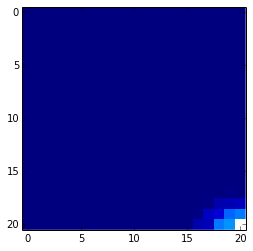

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (2, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 

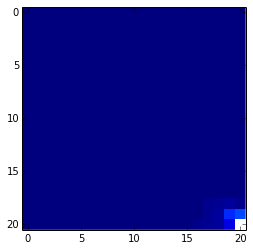

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(0, 1), (0, 2), (0, 3), (0, 0), (0, 2), (0, 1), (0, 1), (0, 1), (0, 3), (0, 3), (0, 1), (0, 3), (0, 1), (0, 1), (0, 3), (0, 3), (0, 2), (0, 1), (0, 3), (0, 2), (0, 2), (0, 1), (0, 2), (0, 1), (0, 3), (0, 2), (0, 

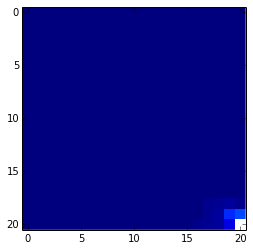

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 6), (0, 5), (0, 5), (0, 6), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 4), (0, 5), (0, 5), (0, 5), (1, 4), (0, 5), (0, 5), (0, 

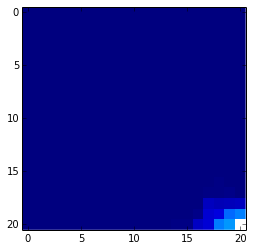

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(1, 0), (1, 0), (0, 0), (1, 1), (2, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (4, 3), (0, 0), (0, 0), (1, 0), (0, 0), (3, 1), (0, 0), (1, 0), (4, 3), (1, 0), (1, 

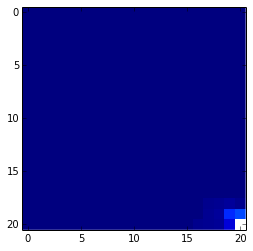

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(2, 5), (2, 7), (0, 3), (2, 7), (2, 7), (2, 7), (2, 8), (0, 7), (1, 7), (1, 7), (1, 7), (2, 8), (1, 7), (0, 7), (0, 7), (1, 4), (2, 4), (4, 7), (2, 8), (1, 7), (2, 6), (0, 7), (1, 7), (0, 7), (0, 6), (4, 8), (2, 

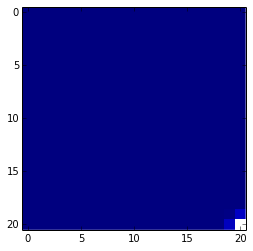

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(0, 0), (2, 2), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (2, 1), (0, 1), (0, 1), (1, 0), (1, 1), (2, 2), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 

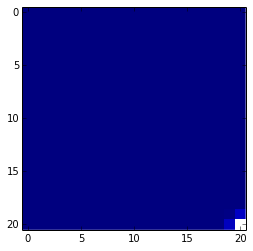

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(2, 2), (1, 0), (1, 0), (2, 1), (1, 4), (3, 3), (2, 0), (1, 0), (1, 0), (1, 0), (0, 5), (0, 4), (2, 0), (1, 0), (2, 0), (2, 1), (1, 1), (1, 4), (0, 0), (2, 1), (2, 1), (2, 0), (1, 0), (2, 0), (2, 0), (1, 0), (2, 

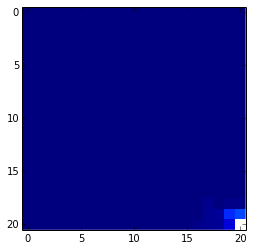

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(2, 3), (0, 4), (0, 4), (0, 5), (1, 4), (2, 4), (0, 4), (0, 4), (1, 4), (0, 4), (0, 4), (0, 4), (2, 3), (0, 0), (0, 4), (0, 0), (1, 4), (2, 3), (1, 4), (2, 4), (2, 4), (1, 4), (2, 3), (0, 0), (1, 5), (0, 5), (1, 

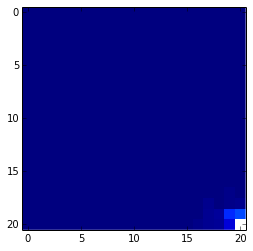

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(5, 6), (5, 6), (4, 3), (4, 3), (3, 3), (0, 3), (0, 4), (4, 4), (5, 6), (3, 5), (3, 4), (1, 5), (0, 5), (3, 3), (5, 6), (5, 6), (4, 3), (0, 4), (0, 5), (0, 5), (2, 5), (4, 4), (3, 3), (3, 5), (5, 7), (5, 6), (4, 

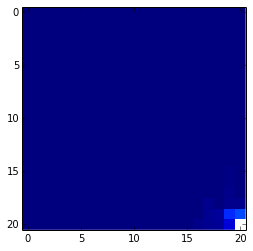

experience 61
prob [ 0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344  0.01639344
  0.01639344] max_prob 0.016393442623
[(3, 5), (3, 4), (0, 4), (3, 6), (2, 6), (2, 3), (2, 6), (3, 5), (4, 6), (3, 6), (2, 3), (3, 6), (1, 3), (1, 2), (0, 6), (1, 3), (1, 3), (0, 0), (4, 6), (2, 5), (1, 6), (1, 6), (1, 6), (3, 5), (1, 6), (3, 6), (2, 

In [271]:
scores = []
for it in range(100):
    learner.run(num_epochs=1, budget=60)
    if it % 10 == 0:
        print 'it', it
        plt.imshow(reward_tabular_normalized(dqn, task, tol=1e-2).reshape((21, 21)), interpolation='none', vmin=0., vmax=1.)
        scores.append(expected_reward_tabular_normalized(dqn, task, tol=1e-2))
        plt.show()
        

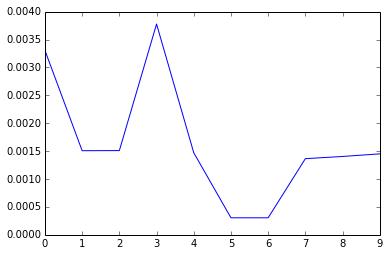

In [273]:
plot(scores)

## Aggregate all examples

In [256]:
dqn = DQN(task, two_layer_arch)
learner = AdaDeepQlearn(task, dqn, tau=1.0, lr=1e-4)

experience 1671
prob [ 0.00059844  0.00059844  0.00059844 ...,  0.00059844  0.00059844
  0.00059844] max_prob 0.000598444045482
[(9, 18), (7, 3), (0, 6), (12, 3), (3, 4), (20, 17), (19, 0), (4, 11), (14, 0), (9, 12), (14, 6), (6, 9), (9, 7), (4, 1), (14, 5), (19, 1), (17, 13), (17, 5), (12, 12), (15, 14), (6, 4), (6, 15), (9, 13), (15, 13), (19, 5), (4, 14), (6, 12), (1, 17), (17, 2), (16, 14), (9, 12), (9, 0), (17, 2), (1, 11), (7, 18), (11, 19), (15, 14), (1, 5), (10, 18), (10, 8), (18, 20), (13, 1), (8, 12), (0, 2), (10, 9), (4, 8), (1, 14), (3, 15), (19, 6), (2, 7), (20, 3), (1, 2), (3, 16), (17, 19), (3, 17), (2, 17), (14, 7), (2, 15), (3, 16), (6, 20), (5, 9), (15, 17), (14, 20), (15, 14), (12, 16), (1, 12), (14, 16), (15, 0), (6, 3), (14, 16), (4, 8), (6, 11), (15, 5), (15, 7), (1, 0), (9, 20), (20, 12), (12, 14), (7, 4), (12, 3), (9, 2), (20, 7), (18, 12), (13, 3), (16, 13), (3, 12), (6, 0), (9, 13), (0, 4), (9, 9), (10, 2), (13, 0), (4, 15), (9, 11), (6, 11), (17, 15), (17, 18

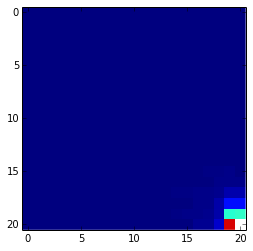

experience 1676
prob [ 0.00059666  0.00059666  0.00059666 ...,  0.00059666  0.00059666
  0.00059666] max_prob 0.000596658711217
[(7, 4), (15, 4), (1, 3), (10, 17), (17, 16), (7, 1), (3, 4), (7, 3), (9, 2), (4, 8), (12, 9), (16, 12), (16, 1), (1, 19), (20, 4), (4, 15), (14, 1), (2, 0), (19, 12), (14, 4), (5, 18), (2, 4), (6, 13), (19, 16), (3, 1), (6, 11), (7, 19), (3, 2), (9, 9), (8, 15), (7, 9), (11, 13), (11, 2), (7, 1), (15, 6), (1, 19), (0, 19), (20, 1), (9, 14), (11, 16), (20, 16), (11, 12), (9, 7), (8, 7), (0, 14), (18, 3), (15, 19), (4, 6), (13, 8), (2, 20), (10, 20), (9, 8), (9, 7), (8, 20), (1, 0), (19, 6), (16, 1), (6, 5), (10, 3), (11, 13), (14, 18), (1, 11), (19, 14), (8, 12), (5, 17), (6, 17), (8, 11), (9, 2), (11, 12), (0, 17), (18, 7), (16, 19), (4, 6), (0, 17), (10, 7), (14, 1), (13, 3), (4, 1), (19, 16), (12, 13), (19, 2), (12, 4), (17, 9), (9, 13), (7, 17), (11, 2), (9, 6), (8, 7), (12, 12), (1, 17), (13, 7), (10, 4), (6, 0), (0, 3), (5, 5), (14, 0), (2, 11), (4, 11),

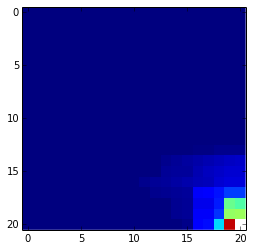

experience 1680
prob [ 0.00059524  0.00059524  0.00059524 ...,  0.00059524  0.00059524
  0.00059524] max_prob 0.000595238095238
[(18, 15), (14, 13), (13, 18), (3, 18), (15, 6), (18, 19), (8, 13), (19, 20), (13, 3), (20, 1), (11, 11), (0, 2), (10, 9), (8, 17), (6, 16), (14, 11), (1, 3), (3, 17), (12, 12), (2, 20), (15, 19), (18, 6), (4, 18), (18, 11), (4, 8), (12, 7), (4, 2), (17, 19), (10, 2), (2, 17), (11, 5), (4, 0), (19, 11), (18, 8), (3, 0), (5, 12), (3, 8), (14, 6), (10, 6), (4, 14), (17, 9), (9, 12), (4, 14), (19, 13), (14, 8), (20, 17), (19, 13), (16, 3), (1, 9), (9, 13), (0, 19), (15, 3), (0, 12), (20, 18), (0, 9), (14, 9), (13, 0), (13, 9), (13, 13), (2, 4), (9, 13), (1, 13), (5, 7), (9, 12), (6, 8), (8, 17), (4, 5), (7, 8), (7, 17), (5, 19), (14, 0), (8, 12), (12, 7), (18, 2), (4, 12), (17, 18), (14, 17), (8, 7), (13, 12), (9, 4), (4, 18), (20, 2), (12, 7), (12, 11), (10, 0), (4, 14), (16, 2), (5, 7), (1, 3), (0, 2), (7, 0), (18, 8), (20, 8), (10, 16), (15, 3), (14, 0), (5, 7

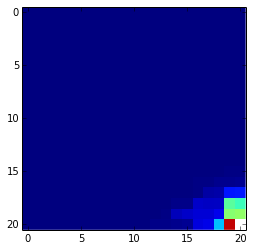

experience 1677
prob [ 0.0005963  0.0005963  0.0005963 ...,  0.0005963  0.0005963  0.0005963] max_prob 0.000596302921884
[(13, 12), (13, 13), (0, 3), (17, 4), (17, 17), (13, 11), (20, 3), (6, 4), (10, 3), (9, 13), (10, 19), (19, 20), (10, 17), (20, 2), (3, 7), (14, 11), (12, 9), (8, 17), (5, 3), (18, 19), (5, 12), (11, 14), (20, 3), (5, 1), (14, 7), (6, 8), (19, 1), (8, 1), (12, 7), (16, 14), (7, 3), (6, 16), (20, 14), (1, 4), (13, 8), (0, 12), (9, 18), (20, 16), (9, 20), (10, 14), (2, 16), (6, 12), (5, 6), (16, 14), (20, 2), (8, 7), (5, 1), (9, 12), (16, 16), (15, 11), (1, 20), (4, 15), (1, 2), (1, 4), (11, 18), (16, 3), (18, 15), (20, 3), (11, 5), (3, 11), (15, 12), (1, 7), (18, 2), (11, 18), (19, 15), (5, 2), (7, 3), (18, 7), (8, 4), (9, 20), (12, 5), (19, 0), (0, 19), (2, 15), (11, 7), (13, 0), (2, 11), (6, 3), (19, 17), (2, 4), (14, 18), (16, 13), (16, 4), (4, 19), (10, 14), (5, 1), (8, 7), (7, 15), (4, 2), (9, 14), (1, 20), (6, 7), (11, 11), (6, 4), (19, 0), (7, 15), (1, 9), (9, 

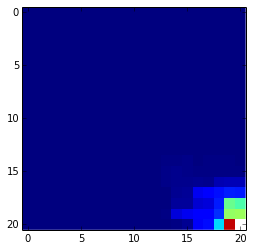

experience 1680
prob [ 0.00059524  0.00059524  0.00059524 ...,  0.00059524  0.00059524
  0.00059524] max_prob 0.000595238095238
[(18, 16), (5, 20), (16, 2), (6, 1), (12, 7), (13, 1), (19, 11), (0, 18), (13, 19), (6, 6), (13, 20), (19, 16), (5, 1), (18, 17), (13, 18), (4, 18), (15, 11), (8, 20), (11, 2), (4, 17), (10, 2), (18, 7), (17, 5), (3, 7), (2, 9), (18, 1), (3, 0), (2, 13), (6, 17), (1, 13), (19, 0), (20, 16), (20, 15), (19, 17), (4, 20), (9, 19), (17, 5), (14, 17), (13, 6), (0, 9), (17, 1), (12, 2), (8, 7), (6, 6), (0, 9), (19, 12), (4, 2), (7, 15), (20, 0), (16, 11), (7, 18), (5, 15), (2, 5), (14, 18), (7, 4), (8, 11), (16, 9), (0, 15), (15, 20), (20, 2), (3, 3), (4, 2), (1, 6), (2, 12), (1, 4), (1, 20), (14, 1), (14, 15), (17, 17), (19, 7), (0, 17), (3, 7), (11, 12), (0, 2), (18, 18), (9, 3), (16, 9), (3, 15), (9, 1), (16, 11), (6, 12), (17, 3), (5, 16), (4, 20), (1, 20), (15, 6), (17, 3), (17, 15), (20, 8), (17, 12), (0, 15), (0, 13), (20, 4), (0, 2), (1, 13), (3, 13), (15, 1

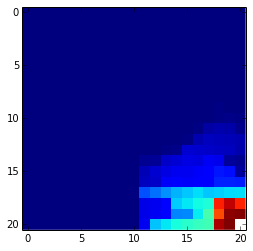

experience 1669
prob [ 0.00059916  0.00059916  0.00059916 ...,  0.00059916  0.00059916
  0.00059916] max_prob 0.000599161174356
[(16, 19), (6, 20), (12, 6), (3, 3), (4, 11), (8, 13), (18, 7), (7, 8), (9, 19), (8, 8), (7, 18), (0, 8), (18, 1), (4, 3), (4, 19), (10, 13), (3, 18), (7, 13), (2, 19), (19, 19), (19, 12), (2, 14), (14, 18), (11, 14), (4, 13), (10, 3), (9, 6), (11, 14), (4, 8), (13, 16), (6, 11), (16, 5), (5, 11), (18, 0), (18, 20), (12, 0), (9, 17), (20, 5), (15, 7), (16, 18), (4, 20), (19, 16), (7, 11), (9, 6), (16, 6), (12, 19), (19, 3), (12, 7), (14, 11), (0, 5), (18, 6), (13, 18), (0, 4), (16, 11), (2, 0), (9, 19), (13, 17), (16, 6), (19, 17), (20, 1), (4, 17), (1, 1), (10, 5), (2, 12), (16, 16), (14, 19), (0, 7), (16, 11), (5, 3), (12, 18), (8, 20), (0, 18), (5, 1), (3, 4), (8, 12), (13, 1), (20, 12), (19, 0), (16, 11), (7, 14), (2, 6), (14, 18), (4, 18), (13, 11), (2, 7), (14, 20), (9, 15), (18, 17), (10, 5), (2, 16), (13, 8), (11, 12), (3, 16), (6, 6), (7, 18), (16, 0)

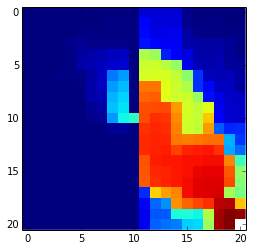

experience 1669
prob [ 0.00059916  0.00059916  0.00059916 ...,  0.00059916  0.00059916
  0.00059916] max_prob 0.000599161174356
[(16, 3), (13, 7), (8, 4), (20, 16), (11, 17), (15, 3), (20, 12), (13, 2), (8, 5), (12, 17), (20, 4), (19, 3), (10, 20), (15, 15), (14, 7), (12, 18), (9, 19), (9, 12), (13, 3), (1, 13), (3, 9), (15, 15), (10, 2), (4, 11), (15, 2), (11, 5), (15, 8), (5, 20), (3, 12), (11, 12), (13, 7), (18, 6), (17, 17), (3, 2), (6, 7), (2, 8), (6, 19), (5, 18), (17, 2), (15, 17), (4, 14), (2, 8), (18, 6), (4, 6), (13, 9), (0, 2), (2, 1), (10, 16), (18, 7), (20, 17), (18, 17), (3, 3), (19, 6), (17, 6), (12, 20), (5, 18), (0, 20), (15, 3), (2, 18), (5, 2), (9, 4), (20, 11), (10, 18), (9, 16), (13, 6), (11, 13), (3, 1), (20, 0), (19, 6), (2, 14), (17, 6), (18, 2), (3, 16), (18, 7), (3, 9), (19, 1), (6, 0), (1, 7), (16, 3), (8, 17), (17, 15), (12, 13), (13, 9), (6, 18), (9, 4), (13, 12), (16, 6), (11, 20), (14, 16), (5, 12), (14, 14), (20, 11), (13, 11), (16, 3), (3, 16), (20, 16)

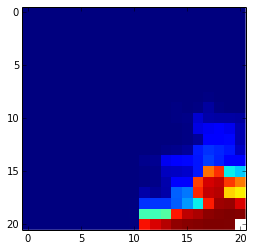

experience 1671
prob [ 0.00059844  0.00059844  0.00059844 ...,  0.00059844  0.00059844
  0.00059844] max_prob 0.000598444045482
[(1, 16), (15, 8), (16, 9), (14, 12), (10, 5), (0, 5), (6, 17), (18, 18), (18, 4), (20, 3), (8, 6), (4, 9), (14, 17), (0, 11), (3, 5), (8, 9), (0, 7), (11, 12), (11, 11), (8, 19), (6, 5), (17, 20), (9, 13), (17, 6), (0, 8), (18, 5), (17, 8), (0, 11), (3, 15), (3, 12), (19, 1), (13, 11), (4, 19), (14, 6), (5, 19), (6, 12), (16, 18), (2, 5), (8, 1), (1, 4), (8, 5), (14, 0), (11, 13), (16, 17), (17, 6), (15, 11), (6, 8), (0, 19), (18, 18), (13, 0), (3, 4), (3, 7), (11, 15), (4, 16), (15, 0), (4, 0), (4, 15), (1, 0), (11, 16), (5, 13), (11, 19), (2, 14), (7, 11), (12, 9), (15, 20), (8, 1), (5, 16), (13, 8), (20, 12), (2, 16), (14, 20), (1, 0), (2, 1), (17, 18), (14, 4), (20, 12), (11, 6), (12, 18), (17, 0), (5, 8), (6, 13), (6, 17), (5, 8), (11, 3), (12, 20), (14, 13), (11, 4), (5, 7), (6, 2), (15, 13), (8, 15), (1, 0), (13, 3), (7, 3), (13, 11), (5, 1), (8, 7), (

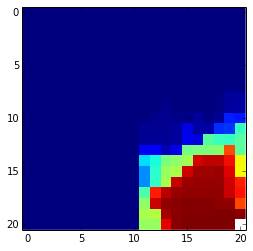

experience 1668
prob [ 0.00059952  0.00059952  0.00059952 ...,  0.00059952  0.00059952
  0.00059952] max_prob 0.000599520383693
[(8, 3), (12, 18), (16, 12), (10, 4), (2, 17), (19, 15), (16, 14), (7, 11), (12, 9), (14, 11), (15, 15), (12, 15), (4, 12), (0, 7), (14, 6), (8, 3), (2, 12), (4, 3), (2, 11), (9, 4), (0, 7), (19, 3), (10, 9), (16, 1), (1, 16), (17, 19), (5, 18), (7, 9), (7, 11), (10, 3), (7, 20), (14, 9), (10, 0), (2, 17), (1, 18), (17, 18), (6, 4), (10, 4), (11, 13), (8, 12), (14, 9), (13, 17), (13, 11), (2, 2), (4, 4), (19, 15), (0, 13), (14, 5), (13, 3), (4, 9), (20, 19), (6, 11), (10, 0), (19, 15), (16, 14), (4, 16), (5, 14), (2, 6), (18, 15), (1, 13), (7, 20), (4, 14), (15, 20), (20, 15), (9, 6), (18, 9), (19, 7), (3, 13), (17, 18), (0, 5), (18, 9), (17, 18), (7, 1), (12, 18), (17, 18), (9, 9), (2, 12), (17, 18), (6, 4), (6, 6), (8, 3), (20, 8), (20, 6), (1, 16), (8, 18), (8, 7), (16, 15), (10, 7), (18, 4), (16, 12), (19, 3), (6, 7), (7, 8), (7, 11), (4, 16), (7, 16), (15

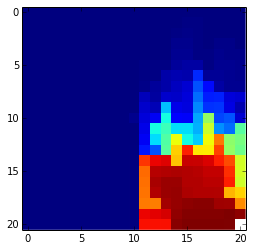

experience 1672
prob [ 0.00059809  0.00059809  0.00059809 ...,  0.00059809  0.00059809
  0.00059809] max_prob 0.000598086124402
[(15, 13), (12, 5), (14, 17), (12, 8), (17, 15), (19, 8), (8, 18), (12, 8), (12, 13), (17, 9), (18, 5), (11, 11), (8, 4), (10, 1), (11, 13), (17, 14), (2, 20), (1, 16), (1, 2), (2, 4), (18, 0), (20, 17), (3, 12), (18, 18), (13, 4), (11, 11), (0, 9), (8, 5), (18, 12), (3, 5), (13, 14), (3, 15), (18, 5), (8, 6), (12, 8), (6, 15), (1, 4), (13, 3), (8, 14), (5, 12), (10, 15), (7, 6), (5, 15), (9, 20), (10, 1), (12, 17), (5, 20), (7, 20), (19, 9), (6, 6), (16, 19), (5, 6), (3, 0), (19, 3), (4, 14), (4, 8), (4, 4), (1, 4), (5, 6), (5, 5), (16, 9), (10, 10), (8, 18), (13, 8), (19, 5), (13, 5), (3, 2), (9, 4), (19, 5), (17, 9), (10, 11), (15, 5), (3, 14), (5, 12), (0, 18), (0, 14), (12, 5), (12, 4), (5, 14), (0, 7), (12, 11), (13, 19), (5, 5), (13, 8), (1, 15), (18, 11), (20, 19), (18, 18), (8, 8), (6, 6), (20, 3), (15, 2), (17, 16), (19, 1), (14, 19), (5, 2), (13, 4)

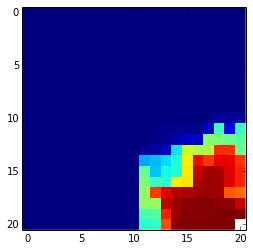

experience 1672
prob [ 0.00059809  0.00059809  0.00059809 ...,  0.00059809  0.00059809
  0.00059809] max_prob 0.000598086124402
[(17, 4), (14, 19), (1, 1), (1, 2), (9, 18), (20, 19), (0, 11), (8, 17), (11, 13), (12, 7), (1, 1), (8, 8), (17, 6), (20, 12), (20, 8), (8, 16), (4, 12), (8, 16), (18, 6), (15, 5), (4, 4), (16, 6), (1, 16), (7, 7), (7, 18), (1, 4), (9, 19), (7, 8), (8, 15), (7, 9), (2, 12), (14, 13), (19, 20), (12, 0), (13, 17), (15, 6), (16, 3), (10, 4), (6, 12), (12, 20), (11, 20), (16, 17), (9, 0), (19, 8), (5, 6), (4, 16), (19, 2), (5, 9), (20, 8), (19, 6), (7, 16), (13, 5), (0, 4), (14, 16), (19, 1), (8, 19), (12, 18), (8, 8), (0, 20), (18, 11), (4, 15), (17, 2), (1, 8), (18, 3), (8, 14), (20, 14), (9, 16), (2, 11), (5, 5), (20, 7), (16, 2), (1, 2), (7, 2), (17, 8), (3, 2), (14, 5), (2, 16), (20, 5), (9, 2), (5, 12), (12, 3), (5, 13), (10, 9), (5, 4), (20, 9), (20, 16), (12, 14), (12, 18), (13, 2), (5, 18), (4, 11), (17, 7), (15, 5), (3, 17), (20, 6), (0, 15), (7, 15), (1

In [253]:
scores = []
for it in range(100):
    learner.run(num_epochs=1, budget=3)
    if it % 10 == 0:
        print 'it', it
        plt.imshow(reward_tabular_normalized(dqn, task, tol=1e-2).reshape((21, 21)), interpolation='none', vmin=0., vmax=1.)
        scores.append(expected_reward_tabular_normalized(dqn, task, tol=1e-2))
        plt.show()
        

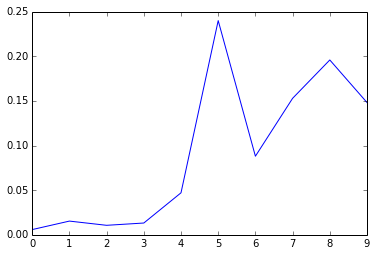

In [255]:
plot(scores)

## Adaptively choose (s,a,s',r) tuples

### Run 1

experience 1670
prob [ 0.0005988  0.0005988  0.0005988 ...,  0.0005988  0.0005988  0.0005988] max_prob 0.00059880239521
[(18, 12), (15, 19), (1, 13), (12, 15), (13, 14), (19, 7), (0, 11), (10, 10), (1, 8), (4, 17), (3, 8), (20, 11), (20, 6), (10, 17), (15, 14), (14, 3), (20, 0), (16, 17), (3, 14), (11, 3), (11, 16), (6, 19), (4, 15), (3, 7), (12, 15), (8, 20), (16, 16), (20, 6), (4, 15), (15, 9), (2, 16), (18, 5), (8, 7), (1, 16), (0, 6), (5, 7), (3, 2), (13, 18), (4, 18), (1, 12), (9, 2), (3, 4), (20, 6), (19, 5), (0, 16), (8, 5), (5, 5), (6, 13), (6, 19), (16, 17), (16, 0), (9, 12), (1, 14), (8, 5), (16, 8), (19, 20), (1, 7), (4, 20), (9, 13), (2, 20), (9, 6), (15, 14), (5, 12), (9, 2), (20, 19), (6, 5), (5, 4), (7, 12), (15, 17), (20, 5), (13, 15), (10, 7), (17, 4), (19, 18), (7, 1), (14, 3), (8, 1), (5, 8), (9, 8), (8, 17), (9, 6), (8, 2), (20, 3), (11, 17), (15, 7), (7, 14), (20, 9), (10, 3), (16, 20), (8, 3), (10, 7), (9, 13), (6, 16), (10, 7), (6, 1), (17, 9), (20, 17), (1, 14),

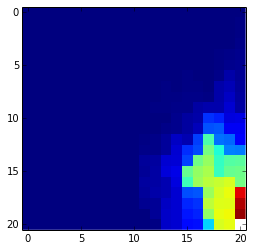

experience 1674
prob [  4.87202294e-13   8.00069745e-14   7.23990256e-08 ...,   1.96747648e-12
   1.96747648e-12   6.70679595e-05] max_prob 0.114899954077
[(10, 12), (10, 12), (3, 3), (10, 12), (11, 11), (15, 7), (0, 11), (11, 11), (10, 12), (10, 12), (10, 12), (10, 12), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (10, 12), (10, 12), (11, 11), (10, 12), (11, 11), (11, 11), (10, 12), (10, 12), (10, 12), (11, 11), (10, 12), (10, 12), (10, 12), (13, 1), (10, 12), (11, 7), (11, 11), (11, 11), (11, 11), (11, 11), (11, 11), (10, 12), (11, 11), (10, 12), (3, 14), (10, 12), (10, 12), (10, 12), (11, 11), (11, 11), (11, 11), (11, 11), (10, 12), (10, 12), (11, 11), (10, 12), (10, 12), (11, 11), (4, 13), (10, 12), (11, 11), (10, 12), (10, 12), (10, 12), (10, 12), (10, 12), (10, 12), (11, 11), (11, 11), (11, 11), (10, 12), (10, 12), (11, 11), (11, 11), (10, 12), (7, 17), (10, 12), (11, 11), (10, 12), (10, 12), (10, 12), (10, 12), (15, 5), (16, 9), (11, 11), (10, 12), (10, 12), (10, 12), (10, 

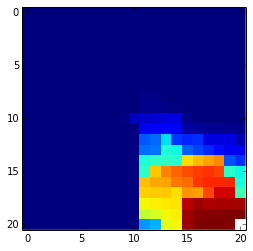

experience 1668
prob [  4.80563918e-08   4.37395255e-08   4.82695872e-08 ...,   7.01065446e-07
   1.88582880e-09   1.88582880e-09] max_prob 0.146801716641
[(5, 17), (6, 16), (6, 18), (6, 18), (6, 16), (6, 16), (6, 16), (6, 16), (5, 17), (5, 17), (6, 16), (6, 16), (7, 17), (7, 17), (19, 15), (6, 16), (6, 16), (7, 17), (7, 17), (7, 17), (7, 17), (7, 17), (6, 16), (6, 18), (6, 16), (6, 16), (7, 17), (6, 18), (7, 17), (6, 18), (6, 16), (7, 17), (6, 18), (7, 17), (6, 16), (7, 17), (7, 17), (6, 18), (6, 18), (7, 17), (7, 17), (7, 17), (6, 16), (6, 16), (6, 16), (6, 16), (6, 18), (6, 18), (6, 16), (6, 18), (16, 7), (5, 17), (6, 16), (7, 17), (7, 17), (7, 17), (6, 18), (7, 17), (15, 8), (7, 17), (5, 17), (7, 17), (7, 17), (6, 16), (6, 16), (6, 16), (6, 16), (7, 17), (7, 17), (7, 17), (5, 17), (6, 16), (7, 17), (6, 18), (6, 16), (7, 17), (6, 16), (6, 18), (7, 17), (7, 17), (7, 17), (5, 17), (7, 17), (6, 16), (7, 17), (7, 17), (6, 16), (6, 16), (6, 17), (16, 7), (7, 17), (6, 16), (7, 17), (7, 17

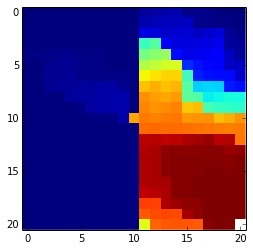

experience 1671
prob [  3.33370780e-21   1.34064906e-08   1.88549426e-10 ...,   9.54197740e-23
   5.65621257e-15   1.39261705e-28] max_prob 0.170916389445
[(16, 7), (11, 3), (12, 8), (16, 7), (12, 8), (11, 3), (11, 9), (12, 8), (16, 7), (11, 9), (12, 8), (16, 7), (16, 7), (16, 7), (16, 7), (11, 3), (15, 8), (12, 8), (16, 7), (12, 8), (16, 7), (11, 9), (11, 9), (11, 9), (16, 7), (15, 8), (12, 8), (11, 9), (15, 8), (4, 8), (11, 3), (16, 7), (16, 7), (16, 7), (16, 7), (11, 9), (16, 7), (11, 9), (16, 7), (11, 9), (16, 7), (15, 8), (15, 8), (16, 7), (16, 7), (12, 8), (12, 8), (16, 7), (16, 7), (15, 8), (16, 7), (15, 8), (12, 8), (11, 3), (15, 8), (11, 9), (16, 7), (12, 8), (12, 8), (11, 9), (16, 7), (15, 8), (15, 8), (11, 9), (15, 8), (15, 8), (12, 8), (11, 9), (15, 8), (16, 7), (15, 8), (12, 8), (16, 7), (12, 8), (11, 9), (15, 8), (11, 3), (12, 8), (16, 7), (11, 9), (12, 8), (16, 7), (12, 8), (15, 8), (12, 8), (15, 8), (15, 8), (12, 8), (12, 8), (11, 9), (12, 8), (4, 8), (15, 8), (16, 7), 

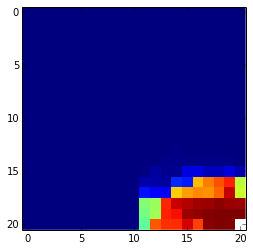

experience 1672
prob [  3.75177425e-11   1.41603538e-09   3.75177425e-11 ...,   3.63123959e-05
   5.65982971e-09   1.06137167e-11] max_prob 0.12523141988
[(16, 5), (15, 6), (16, 7), (15, 5), (16, 5), (16, 7), (15, 6), (15, 6), (16, 5), (15, 6), (16, 7), (16, 5), (15, 6), (15, 6), (15, 5), (6, 7), (16, 7), (16, 7), (15, 6), (15, 6), (15, 6), (6, 7), (16, 7), (15, 5), (15, 6), (15, 6), (15, 5), (15, 5), (13, 8), (15, 6), (15, 6), (15, 6), (16, 6), (16, 6), (15, 6), (15, 6), (15, 6), (15, 5), (15, 5), (16, 5), (16, 7), (15, 5), (15, 6), (15, 6), (16, 5), (16, 7), (15, 5), (15, 6), (15, 6), (15, 6), (15, 6), (15, 5), (15, 6), (16, 5), (16, 7), (15, 6), (15, 5), (15, 5), (6, 7), (16, 6), (16, 6), (16, 7), (15, 5), (15, 6), (15, 5), (15, 5), (15, 5), (16, 6), (16, 7), (15, 6), (16, 6), (16, 7), (15, 6), (16, 6), (15, 6), (15, 6), (15, 5), (15, 6), (16, 7), (15, 6), (16, 5), (15, 5), (16, 5), (16, 6), (15, 5), (15, 5), (15, 5), (15, 6), (11, 8), (15, 6), (15, 5), (16, 7), (15, 5), (6, 7), (15

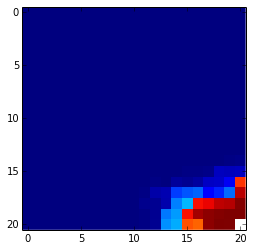

experience 1669
prob [  8.88718510e-06   8.88718510e-06   8.17536351e-06 ...,   4.93904141e-05
   7.05024468e-07   7.05024468e-07] max_prob 0.116402692072
[(11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (9, 2), (11, 12), (9, 2), (11, 12), (11, 12), (9, 2), (11, 14), (11, 12), (11, 14), (11, 12), (11, 14), (11, 14), (11, 12), (9, 2), (9, 2), (11, 12), (11, 14), (9, 2), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (9, 2), (11, 14), (11, 12), (11, 14), (11, 12), (11, 12), (11, 14), (11, 12), (11, 12), (11, 19), (9, 2), (11, 12), (11, 12), (11, 12), (11, 12), (11, 14), (17, 14), (11, 14), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 14), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (11, 12), (9, 2), (11, 12), (11, 12), (11, 14), (11, 12), (11, 14), (11, 12), (11, 12), (11, 14), (9, 2), (11, 12), (11, 12), (11, 14), (9, 2), (11, 14), (9, 2), (9, 2), (11, 12), (11, 12), (11, 12), (20, 2), (9, 2), (11

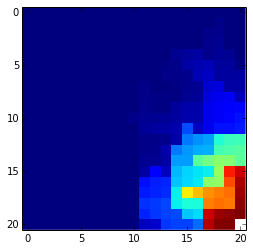

experience 1667
prob [  3.47953104e-03   1.04416836e-07   1.11472911e-07 ...,   2.09253639e-07
   1.14558571e-06   1.14558571e-06] max_prob 0.0733308172052
[(14, 13), (3, 8), (13, 11), (9, 2), (3, 15), (9, 2), (5, 7), (4, 9), (13, 12), (5, 7), (20, 14), (9, 2), (13, 12), (4, 9), (20, 7), (9, 2), (13, 12), (4, 9), (1, 15), (4, 9), (1, 15), (7, 5), (9, 2), (0, 5), (9, 2), (13, 12), (9, 2), (13, 12), (3, 15), (5, 7), (9, 2), (9, 2), (9, 2), (3, 15), (3, 8), (12, 7), (13, 12), (3, 8), (13, 12), (13, 12), (13, 12), (13, 12), (3, 15), (13, 12), (4, 9), (4, 9), (8, 3), (9, 2), (14, 13), (13, 12), (13, 12), (13, 11), (13, 12), (8, 3), (18, 19), (13, 12), (13, 12), (5, 7), (5, 7), (13, 12), (2, 16), (3, 8), (10, 3), (1, 15), (2, 3), (8, 3), (13, 12), (13, 12), (13, 11), (9, 2), (10, 3), (13, 12), (5, 7), (13, 12), (9, 2), (13, 12), (13, 12), (4, 9), (13, 12), (3, 8), (9, 2), (2, 16), (3, 8), (9, 2), (13, 12), (13, 12), (2, 16), (20, 14), (13, 12), (5, 7), (3, 15), (5, 7), (1, 15), (4, 9), (5, 7

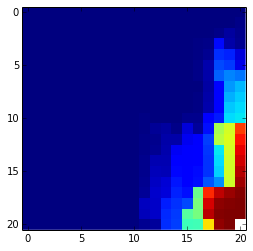

experience 1669
prob [  1.11432619e-04   4.10060878e-10   1.02591879e-06 ...,   3.37067832e-09
   1.68861071e-09   6.00661854e-12] max_prob 0.210210414358
[(14, 18), (12, 12), (14, 18), (14, 18), (14, 18), (16, 15), (14, 18), (16, 15), (14, 18), (13, 12), (13, 12), (14, 18), (14, 18), (13, 17), (13, 12), (14, 18), (12, 3), (14, 18), (16, 15), (3, 4), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (13, 17), (13, 12), (16, 15), (13, 17), (13, 17), (14, 18), (14, 18), (16, 15), (14, 18), (16, 15), (3, 4), (3, 4), (13, 12), (13, 17), (14, 18), (12, 12), (13, 17), (16, 15), (14, 18), (14, 18), (14, 18), (16, 15), (14, 18), (16, 15), (14, 18), (13, 12), (16, 15), (16, 15), (14, 18), (16, 15), (14, 18), (14, 18), (16, 15), (16, 15), (14, 18), (14, 18), (14, 18), (16, 15), (13, 12), (8, 18), (13, 17), (14, 18), (14, 18), (14, 18), (14, 18), (16, 15), (16, 15), (14, 18), (14, 18), (16, 15), (14, 18), (16, 15), (14, 18), (12, 12), (14, 18), (13, 17), (14, 18), (14, 18), (13, 17), (1

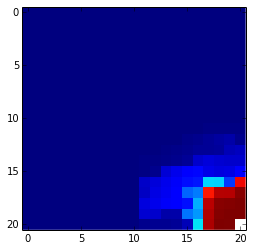

experience 1668
prob [  1.90402262e-12   1.90402262e-12   1.90402262e-12 ...,   2.97122237e-07
   1.00616718e-06   1.00616718e-06] max_prob 0.941398703671
[(20, 18), (20, 18), (20, 18), (20, 18), (6, 9), (20, 18), (20, 18), (20, 18), (0, 12), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (6, 8), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (0, 12), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (0, 11), (20, 18), (20, 18), (3, 3), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (0, 11), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (20, 18), (0, 

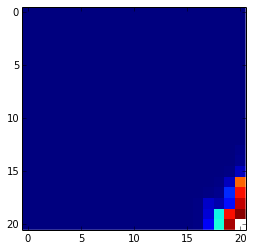

experience 1670
prob [  5.68568059e-14   5.68568059e-14   1.42275243e-15 ...,   5.11636624e-14
   7.45770654e-11   7.45770654e-11] max_prob 0.499999939369
[(0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19), (0, 19)

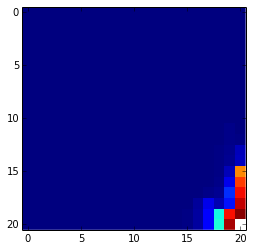

experience 1671
prob [  3.43009610e-05   3.43009610e-05   3.43009610e-05 ...,   1.53633941e-02
   4.93974697e-06   4.93974697e-06] max_prob 0.0881310649517
[(2, 11), (20, 17), (4, 11), (14, 1), (9, 19), (1, 6), (14, 1), (17, 2), (14, 1), (10, 18), (9, 18), (14, 0), (2, 18), (2, 11), (17, 14), (15, 6), (19, 12), (10, 17), (9, 19), (20, 2), (14, 1), (15, 3), (19, 14), (3, 11), (17, 7), (15, 2), (13, 7), (12, 17), (19, 13), (17, 0), (15, 2), (13, 16), (19, 18), (4, 11), (15, 1), (8, 17), (15, 2), (13, 1), (15, 2), (20, 18), (0, 7), (2, 11), (14, 1), (15, 2), (17, 0), (0, 18), (11, 2), (19, 12), (15, 2), (16, 8), (20, 3), (17, 14), (0, 5), (9, 19), (1, 7), (19, 14), (7, 7), (15, 3), (15, 2), (12, 17), (8, 17), (17, 8), (14, 1), (9, 9), (3, 11), (12, 19), (4, 11), (4, 11), (19, 14), (5, 18), (2, 16), (18, 0), (0, 6), (17, 0), (13, 7), (2, 18), (4, 11), (14, 5), (1, 18), (9, 19), (9, 18), (17, 0), (18, 5), (12, 14), (19, 13), (4, 11), (15, 2), (14, 1), (15, 3), (15, 2), (14, 1), (14, 1), (14

In [275]:
dqn = DQN(task, two_layer_arch)
learner = AdaDeepQlearn(task, dqn, tau=1.0, lr=1e-4)

scores = []
for it in range(100):
    learner.run(num_epochs=1, budget=3)
    if it % 10 == 0:
        print 'it', it
        plt.imshow(reward_tabular_normalized(dqn, task, tol=1e-2).reshape((21, 21)), interpolation='none', vmin=0., vmax=1.)
        scores.append(expected_reward_tabular_normalized(dqn, task, tol=1e-2))
        plt.show()
        

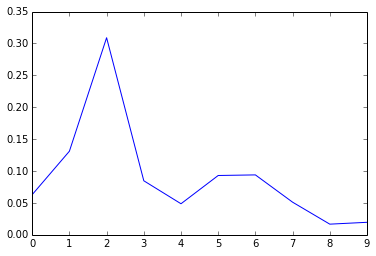

In [276]:
plot(scores)

### Run 2

experience 1680
prob [ 0.00059524  0.00059524  0.00059524 ...,  0.00059524  0.00059524
  0.00059524] max_prob 0.000595238095238
[(18, 20), (4, 2), (10, 13), (3, 6), (16, 9), (8, 11), (11, 9), (14, 15), (4, 12), (18, 3), (11, 14), (12, 3), (16, 5), (15, 9), (17, 11), (15, 2), (11, 14), (6, 1), (8, 20), (7, 14), (10, 14), (2, 14), (9, 8), (2, 5), (5, 5), (12, 12), (4, 13), (10, 8), (14, 18), (1, 16), (3, 1), (13, 20), (0, 4), (2, 1), (3, 12), (20, 4), (11, 1), (13, 7), (5, 11), (17, 11), (17, 11), (12, 5), (20, 13), (3, 20), (15, 13), (10, 6), (3, 12), (18, 14), (18, 4), (20, 2), (7, 17), (16, 16), (15, 19), (1, 4), (3, 15), (0, 7), (1, 14), (14, 18), (16, 7), (18, 13), (13, 16), (13, 4), (1, 9), (4, 19), (6, 4), (16, 12), (14, 20), (3, 13), (20, 13), (16, 12), (2, 4), (10, 10), (8, 1), (9, 20), (16, 2), (2, 4), (10, 17), (9, 16), (13, 2), (14, 14), (3, 14), (6, 9), (8, 1), (13, 4), (8, 0), (11, 19), (18, 9), (17, 16), (9, 8), (14, 19), (5, 2), (17, 17), (6, 3), (2, 2), (18, 8), (16, 6),

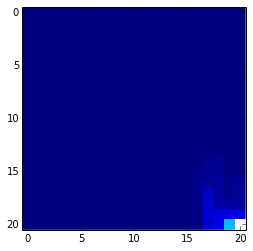

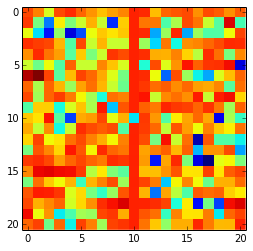

experience 1680
prob [  1.89026701e-04   4.10649516e-11   6.72534868e-06 ...,   5.29494910e-07
   5.29494910e-07   5.52837421e-04] max_prob 0.132173753669
[(6, 0), (7, 1), (6, 0), (7, 1), (7, 1), (6, 0), (10, 0), (7, 1), (5, 17), (7, 1), (8, 17), (6, 0), (6, 0), (4, 15), (6, 2), (6, 0), (6, 0), (7, 0), (6, 2), (5, 3), (6, 2), (0, 19), (4, 17), (14, 9), (6, 0), (7, 1), (4, 13), (6, 2), (7, 1), (17, 8), (18, 20), (18, 20), (7, 1), (6, 0), (4, 17), (2, 19), (9, 8), (18, 20), (17, 8), (7, 1), (11, 14), (6, 0), (7, 1), (6, 0), (6, 0), (9, 19), (7, 1), (7, 1), (19, 0), (15, 2), (7, 1), (7, 1), (7, 1), (6, 0), (7, 1), (6, 0), (4, 6), (6, 2), (6, 0), (9, 14), (9, 19), (8, 14), (19, 13), (18, 20), (7, 1), (10, 20), (7, 1), (6, 2), (19, 20), (6, 0), (18, 19), (6, 0), (6, 0), (6, 0), (18, 20), (7, 1), (18, 15), (3, 11), (0, 18), (18, 20), (0, 19), (6, 0), (6, 2), (6, 0), (6, 2), (12, 2), (2, 19), (10, 13), (16, 14), (6, 0), (18, 15), (7, 1), (11, 11), (6, 0), (15, 2), (8, 17), (6, 2), (7, 5), (6,

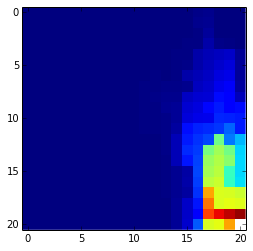

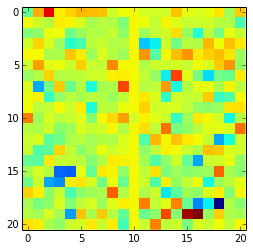

experience 1677
prob [  1.38371180e-06   5.98253498e-05   3.01391702e-06 ...,   9.58576257e-06
   8.17388593e-06   6.22888044e-05] max_prob 0.108837386329
[(5, 9), (18, 16), (20, 15), (20, 15), (20, 15), (18, 16), (6, 9), (19, 16), (18, 16), (0, 5), (18, 15), (20, 15), (16, 18), (19, 16), (18, 15), (18, 16), (18, 16), (18, 16), (18, 16), (18, 15), (18, 16), (12, 14), (11, 12), (0, 2), (4, 14), (18, 16), (20, 15), (13, 18), (19, 16), (19, 16), (20, 12), (20, 15), (18, 16), (18, 16), (19, 16), (0, 2), (18, 16), (20, 15), (0, 2), (18, 16), (18, 16), (4, 19), (0, 2), (18, 16), (18, 15), (20, 15), (19, 16), (20, 15), (19, 16), (20, 15), (18, 16), (18, 15), (19, 16), (18, 13), (20, 15), (20, 15), (20, 15), (20, 15), (18, 16), (18, 16), (0, 2), (0, 2), (18, 16), (18, 16), (18, 16), (0, 2), (18, 15), (20, 15), (0, 2), (20, 15), (18, 16), (18, 16), (0, 2), (19, 16), (18, 16), (20, 15), (0, 2), (0, 2), (18, 16), (0, 2), (20, 12), (18, 16), (18, 16), (18, 15), (18, 16), (18, 15), (20, 13), (20, 1

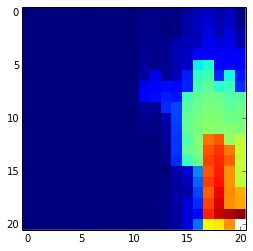

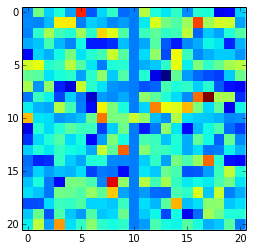

experience 1673
prob [  5.89286043e-05   6.41877739e-05   5.75287042e-05 ...,   3.91103413e-04
   3.91103413e-04   5.54950819e-05] max_prob 0.0696671955494
[(16, 16), (0, 5), (19, 3), (7, 17), (0, 5), (0, 16), (7, 17), (20, 12), (2, 3), (0, 5), (0, 16), (4, 1), (18, 13), (0, 13), (17, 8), (7, 9), (7, 19), (10, 10), (13, 8), (1, 5), (9, 11), (0, 19), (17, 5), (1, 5), (0, 5), (5, 12), (19, 3), (19, 9), (17, 8), (17, 8), (0, 4), (0, 5), (3, 4), (17, 8), (17, 8), (13, 17), (13, 8), (9, 0), (1, 5), (5, 17), (0, 16), (1, 5), (0, 18), (0, 5), (0, 5), (7, 17), (0, 5), (12, 9), (9, 13), (13, 12), (17, 14), (7, 19), (7, 17), (1, 7), (17, 8), (9, 0), (1, 5), (19, 3), (17, 8), (20, 0), (17, 8), (17, 14), (0, 5), (7, 17), (5, 18), (6, 5), (4, 1), (16, 9), (15, 1), (7, 17), (16, 9), (19, 19), (13, 14), (10, 3), (5, 15), (16, 9), (9, 13), (7, 17), (13, 16), (7, 19), (0, 5), (1, 15), (8, 15), (16, 5), (7, 19), (1, 5), (15, 15), (16, 9), (17, 14), (13, 8), (18, 13), (17, 8), (7, 17), (16, 9), (7, 17), 

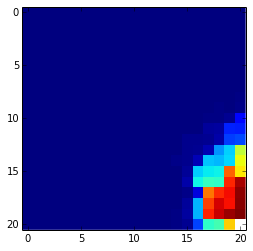

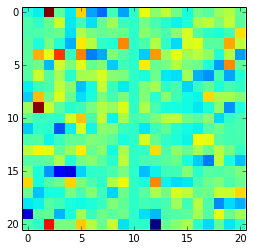

experience 1674
prob [  6.38705077e-06   1.50010539e-05   1.50010539e-05 ...,   2.65011219e-05
   7.54278376e-05   7.63357687e-06] max_prob 0.171259456444
[(9, 2), (19, 2), (7, 1), (1, 2), (9, 2), (9, 2), (9, 2), (0, 1), (2, 15), (3, 5), (9, 2), (1, 2), (0, 1), (1, 2), (5, 5), (0, 1), (0, 1), (19, 2), (19, 2), (9, 2), (9, 2), (9, 2), (5, 3), (9, 2), (9, 2), (9, 2), (5, 5), (1, 2), (20, 3), (1, 2), (19, 2), (3, 1), (0, 1), (5, 12), (1, 2), (1, 2), (9, 2), (20, 3), (0, 1), (20, 3), (9, 2), (0, 1), (20, 3), (1, 2), (9, 2), (9, 2), (19, 2), (5, 3), (9, 2), (0, 1), (19, 2), (9, 2), (20, 3), (0, 1), (0, 1), (12, 17), (0, 1), (20, 3), (5, 5), (5, 5), (1, 2), (9, 2), (0, 1), (0, 1), (0, 1), (1, 2), (20, 3), (3, 3), (4, 2), (0, 1), (0, 1), (9, 2), (3, 12), (9, 2), (9, 9), (5, 5), (5, 3), (9, 2), (9, 2), (1, 2), (9, 2), (1, 2), (18, 20), (5, 3), (3, 9), (5, 3), (3, 5), (9, 2), (0, 1), (9, 2), (9, 2), (18, 17), (9, 2), (3, 5), (3, 3), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (1, 2)

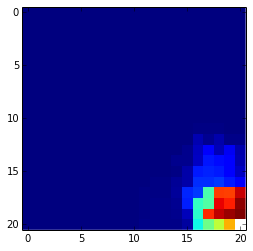

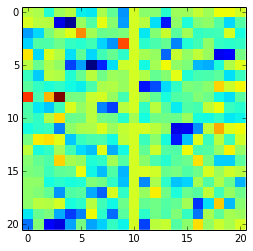

experience 1673
prob [  5.09346136e-04   1.89189888e-06   1.89189888e-06 ...,   1.97106814e-04
   1.97106814e-04   4.63082653e-04] max_prob 0.352037118028
[(13, 16), (3, 9), (8, 4), (16, 12), (3, 9), (8, 4), (15, 14), (8, 4), (7, 14), (8, 4), (8, 0), (8, 0), (3, 9), (8, 4), (3, 9), (8, 4), (8, 4), (8, 0), (20, 3), (8, 4), (8, 0), (8, 0), (6, 6), (7, 14), (8, 4), (8, 0), (8, 11), (3, 9), (9, 2), (8, 4), (8, 0), (8, 4), (4, 15), (8, 4), (3, 8), (11, 6), (8, 0), (7, 0), (11, 16), (8, 4), (3, 9), (8, 4), (3, 9), (8, 4), (3, 9), (7, 0), (8, 4), (15, 6), (4, 17), (16, 7), (8, 0), (8, 4), (1, 15), (8, 4), (8, 4), (16, 4), (3, 9), (8, 4), (8, 4), (8, 4), (8, 4), (8, 4), (5, 1), (4, 20), (15, 16), (18, 4), (3, 8), (8, 4), (8, 4), (8, 4), (8, 0), (8, 17), (8, 0), (3, 9), (4, 12), (8, 4), (13, 7), (8, 4), (8, 4), (3, 8), (16, 3), (8, 4), (7, 0), (8, 0), (8, 4), (6, 18), (8, 4), (8, 0), (8, 4), (8, 0), (6, 3), (9, 5), (18, 13), (8, 0), (8, 4), (12, 19), (3, 9), (1, 2), (7, 19), (18, 6), (8, 4), (8

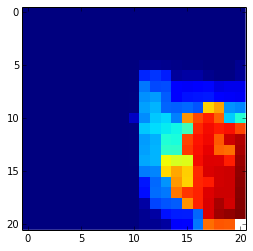

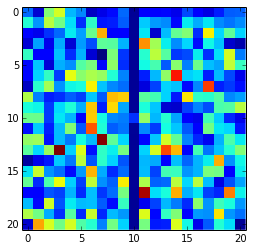

experience 1674
prob [  1.08020562e-10   1.08020562e-10   1.08020562e-10 ...,   1.21984710e-08
   5.01798248e-09   3.10595764e-11] max_prob 0.253135267036
[(11, 7), (11, 7), (11, 7), (16, 11), (16, 11), (11, 7), (13, 4), (13, 4), (11, 7), (13, 4), (11, 7), (11, 7), (13, 4), (17, 11), (11, 7), (15, 3), (11, 7), (11, 7), (11, 7), (16, 19), (13, 4), (11, 7), (13, 4), (11, 7), (16, 11), (13, 4), (17, 11), (11, 7), (11, 7), (11, 7), (11, 7), (13, 4), (11, 7), (11, 7), (16, 11), (16, 11), (13, 4), (11, 7), (13, 4), (13, 4), (13, 4), (16, 19), (16, 11), (16, 11), (11, 7), (11, 7), (13, 4), (13, 4), (11, 7), (16, 11), (13, 4), (11, 5), (13, 4), (11, 7), (13, 4), (16, 11), (17, 11), (11, 7), (17, 11), (11, 7), (13, 4), (11, 7), (17, 11), (13, 4), (11, 7), (16, 11), (11, 7), (16, 11), (11, 7), (11, 7), (16, 11), (11, 7), (16, 11), (16, 11), (13, 4), (11, 7), (7, 18), (11, 7), (11, 7), (11, 7), (13, 4), (13, 4), (11, 7), (11, 7), (11, 7), (16, 11), (11, 7), (13, 4), (13, 4), (13, 4), (11, 7), (16

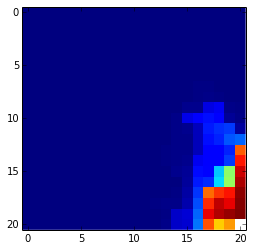

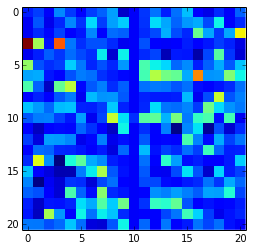

experience 1673
prob [  4.45458859e-06   1.12867886e-06   1.12867886e-06 ...,   2.03503003e-06
   2.03503003e-06   1.11923979e-06] max_prob 0.231142215785
[(3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (6, 15), (6, 15), (3, 20), (5, 16), (5, 16), (3, 2), (5, 16), (2, 19), (6, 15), (3, 20), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (6, 15), (3, 2), (3, 2), (2, 19), (3, 2), (6, 15), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (13, 6), (3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (4, 1), (3, 2), (3, 2), (6, 15), (3, 2), (5, 16), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (7, 12), (6, 15), (5, 16), (3, 2), (6, 15), (3, 2), (11, 14), (6, 15), (3, 2), (6, 15), (3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (5, 16), (3, 2), (3, 2), (3, 2), (6, 15), (

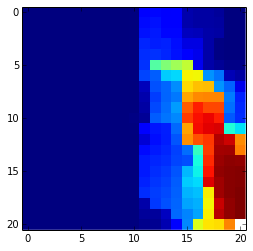

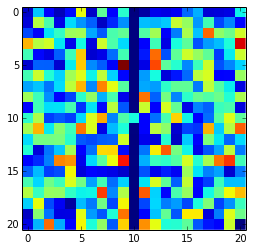

experience 1670
prob [  1.46327754e-51   3.99377868e-33   1.26491914e-42 ...,   1.39254813e-75
   2.90898627e-31   1.39254813e-75] max_prob 0.199999054955
[(5, 9), (4, 9), (5, 9), (4, 9), (5, 9), (4, 9), (4, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (4, 9), (4, 9), (5, 9), (4, 9), (4, 9), (4, 9), (5, 9), (5, 9), (5, 9), (5, 9), (5, 9), (4, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (4, 9), (4, 9), (5, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (4, 9), (5, 9), (4, 9), (4, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (5, 9), (5, 9), (5, 9), (4, 9), (4, 9), (5, 9), (5, 9), (4, 9), (5, 9), (4, 9), (5, 9), (5, 9), (4, 9), (5, 9), (4, 9), (5, 9), (4, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 9), (5, 9), (5, 9), (5, 9), (4, 

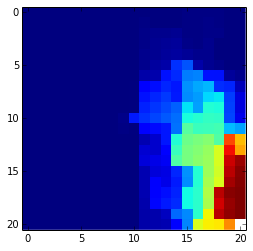

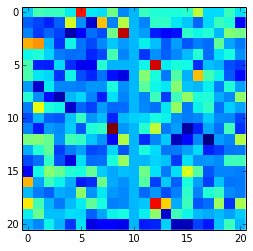

experience 1670
prob [  1.36656409e-12   1.22066134e-17   2.51862812e-18 ...,   6.44075698e-13
   6.44075698e-13   2.72862268e-15] max_prob 0.470346479906
[(10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (6, 12), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (6, 12), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8), (4, 12), (10, 8), (10, 8), (10, 8), (6, 12), (10, 8), (10, 8), (10, 8), (10, 8), (10, 8)

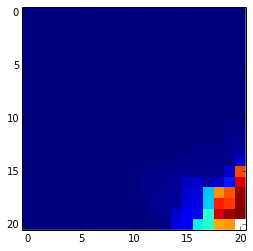

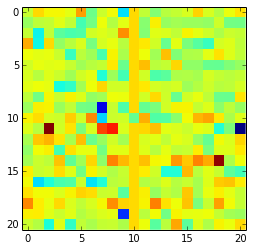

experience 1671
prob [  6.13185427e-10   1.27369746e-12   1.48345391e-18 ...,   4.16506217e-11
   4.16506217e-11   6.43362641e-10] max_prob 0.166311742327
[(14, 19), (15, 18), (15, 18), (14, 19), (14, 19), (14, 19), (14, 19), (15, 18), (15, 18), (14, 19), (14, 19), (15, 18), (13, 18), (14, 19), (15, 18), (14, 19), (14, 19), (15, 18), (14, 19), (14, 19), (15, 18), (14, 19), (14, 19), (13, 18), (14, 19), (15, 18), (14, 19), (14, 19), (14, 19), (15, 18), (14, 19), (14, 19), (14, 19), (14, 19), (13, 18), (14, 19), (15, 18), (14, 19), (15, 18), (13, 18), (15, 18), (14, 19), (15, 18), (14, 19), (15, 18), (15, 18), (15, 18), (14, 19), (14, 19), (13, 18), (14, 19), (14, 19), (14, 19), (15, 18), (15, 18), (14, 19), (14, 19), (14, 19), (15, 18), (14, 19), (15, 18), (14, 19), (14, 19), (14, 19), (14, 19), (15, 18), (15, 18), (15, 18), (14, 19), (15, 18), (14, 19), (15, 18), (15, 18), (13, 18), (15, 18), (14, 19), (13, 18), (13, 18), (14, 19), (14, 19), (15, 18), (14, 19), (15, 18), (15, 18), (13,

In [280]:
dqn = DQN(task, two_layer_arch)
learner = AdaDeepQlearn(task, dqn, tau=1.0, lr=1e-4)

scores = []
for it in range(100):
    learner.run(num_epochs=1, budget=3)
    if it % 10 == 0:
        print 'it', it
        plt.imshow(reward_tabular_normalized(dqn, task, tol=1e-2).reshape((21, 21)), interpolation='none', vmin=0., vmax=1.)
        scores.append(expected_reward_tabular_normalized(dqn, task, tol=1e-2))
        showIs(learner, task)
        plt.show()
        

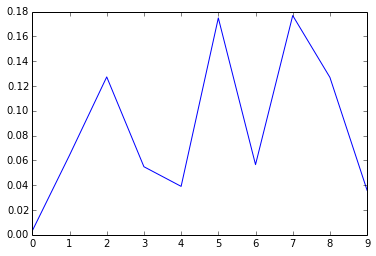

In [281]:
plot(scores)

### Why does the improvement map looks random?

On one hand, we want to use Q values, because they tell us the knowledge about reward at the current state-action. But on the other hand, the Q values are just approximations, and could be inaccurate.

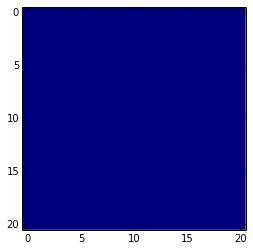

In [290]:
showIs(learner, task)

experience 1673
prob [ 0.00059773  0.00059773  0.00059773 ...,  0.00059773  0.00059773
  0.00059773] max_prob 0.000597728631201
[(11, 8), (19, 12), (10, 15), (0, 19), (15, 3), (0, 20), (16, 1), (3, 15), (11, 16), (17, 15), (17, 20), (18, 5), (0, 2), (20, 13), (9, 8), (9, 1), (7, 2), (17, 4), (14, 4), (11, 9), (7, 0), (2, 14), (11, 6), (2, 4), (11, 17), (4, 3), (15, 8), (19, 3), (5, 5), (20, 1), (6, 18), (4, 20), (14, 14), (14, 18), (5, 9), (8, 20), (16, 15), (6, 17), (11, 3), (0, 11), (11, 16), (15, 12), (2, 20), (0, 15), (14, 18), (11, 13), (18, 17), (9, 2), (7, 1), (5, 8), (6, 9), (13, 3), (4, 20), (18, 8), (0, 2), (20, 7), (11, 13), (18, 9), (18, 9), (3, 0), (3, 8), (2, 3), (7, 20), (15, 8), (2, 4), (14, 0), (8, 1), (15, 3), (16, 13), (11, 4), (6, 20), (8, 15), (3, 7), (14, 12), (2, 15), (15, 1), (11, 12), (5, 9), (11, 8), (17, 15), (5, 2), (19, 13), (5, 7), (15, 15), (18, 20), (17, 6), (12, 14), (12, 0), (19, 1), (2, 2), (16, 11), (18, 20), (18, 19), (0, 3), (4, 7), (7, 1), (12, 7)

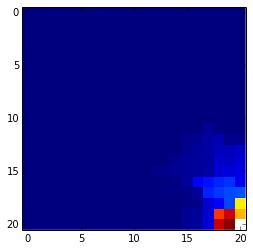

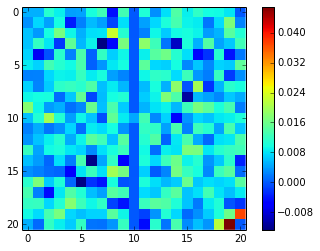

experience 1675
prob [ 0.00057988  0.00060507  0.00059176 ...,  0.00089903  0.00056193
  0.00056193] max_prob 0.000899028440479
[(15, 0), (15, 5), (6, 11), (13, 9), (1, 13), (7, 6), (20, 18), (0, 19), (7, 14), (2, 16), (4, 13), (20, 11), (14, 3), (17, 2), (19, 7), (14, 14), (3, 8), (3, 8), (7, 14), (12, 7), (8, 2), (0, 18), (5, 5), (0, 4), (2, 9), (12, 4), (15, 11), (20, 1), (20, 13), (19, 5), (11, 19), (17, 18), (2, 8), (3, 8), (9, 4), (5, 6), (16, 5), (3, 5), (16, 20), (14, 18), (10, 14), (15, 1), (20, 9), (19, 9), (1, 0), (10, 15), (20, 19), (13, 9), (9, 7), (8, 17), (10, 9), (3, 7), (15, 0), (13, 16), (5, 5), (19, 20), (13, 2), (9, 3), (4, 2), (4, 19), (1, 0), (17, 15), (0, 6), (1, 1), (13, 13), (13, 12), (15, 16), (20, 12), (20, 14), (17, 0), (11, 12), (3, 12), (10, 11), (4, 18), (15, 20), (8, 17), (12, 7), (2, 3), (6, 13), (2, 8), (13, 0), (13, 1), (16, 19), (11, 19), (1, 0), (19, 17), (18, 13), (19, 14), (17, 6), (13, 9), (11, 20), (2, 8), (17, 9), (6, 8), (3, 6), (2, 19), (20, 

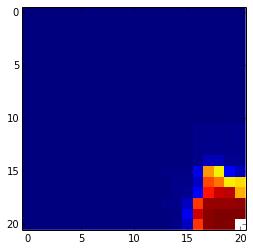

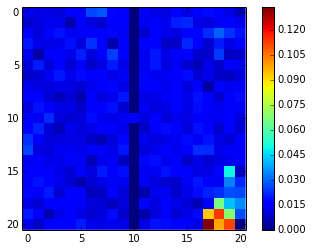

experience 1672
prob [ 0.00059873  0.00059873  0.00059873 ...,  0.0016427   0.00052494
  0.00052494] max_prob 0.00200163993606
[(12, 8), (6, 2), (16, 17), (2, 19), (18, 14), (9, 8), (2, 12), (4, 1), (0, 5), (14, 12), (5, 14), (17, 14), (15, 8), (11, 14), (9, 1), (1, 20), (10, 4), (6, 8), (7, 2), (15, 3), (8, 19), (19, 0), (11, 15), (19, 12), (3, 9), (5, 18), (18, 14), (14, 12), (12, 17), (6, 5), (3, 15), (14, 15), (13, 13), (7, 6), (7, 14), (13, 19), (17, 11), (18, 6), (14, 5), (9, 11), (19, 17), (10, 7), (19, 11), (12, 12), (3, 15), (5, 17), (13, 20), (18, 4), (15, 9), (8, 13), (16, 0), (19, 12), (20, 4), (10, 18), (1, 9), (4, 2), (2, 6), (9, 9), (10, 14), (4, 3), (19, 7), (8, 16), (7, 19), (2, 1), (4, 14), (8, 13), (2, 15), (13, 9), (18, 20), (9, 2), (6, 15), (6, 12), (6, 5), (5, 7), (5, 17), (13, 1), (6, 9), (1, 3), (4, 13), (12, 1), (3, 0), (16, 3), (17, 14), (8, 12), (2, 11), (16, 1), (4, 13), (11, 7), (7, 5), (3, 3), (15, 9), (20, 18), (4, 0), (19, 17), (20, 8), (20, 7), (15, 4),

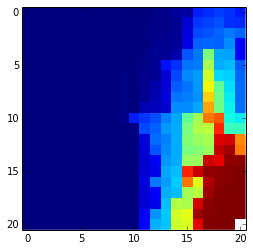

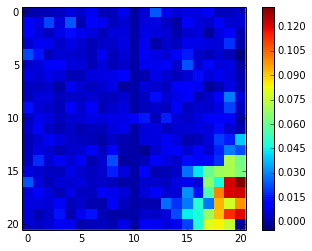

experience 1669
prob [ 0.0005892   0.00056572  0.00053227 ...,  0.00164626  0.00175661
  0.00052789] max_prob 0.00198157442923
[(3, 4), (15, 17), (15, 16), (17, 20), (11, 14), (14, 16), (13, 3), (9, 14), (15, 16), (17, 2), (16, 0), (6, 7), (6, 15), (14, 19), (16, 7), (11, 20), (0, 11), (17, 16), (19, 4), (3, 16), (2, 19), (10, 19), (20, 18), (5, 5), (8, 20), (11, 18), (9, 12), (19, 12), (20, 18), (1, 1), (6, 15), (15, 4), (20, 3), (17, 4), (15, 13), (13, 18), (20, 5), (9, 14), (15, 11), (18, 13), (19, 15), (5, 0), (20, 18), (6, 0), (7, 2), (20, 9), (14, 8), (17, 18), (17, 5), (15, 19), (20, 13), (7, 19), (17, 19), (1, 9), (16, 16), (6, 15), (8, 8), (7, 4), (1, 13), (13, 18), (11, 8), (19, 16), (2, 20), (15, 18), (11, 17), (6, 16), (8, 7), (8, 20), (20, 13), (16, 8), (15, 13), (3, 0), (18, 2), (2, 12), (1, 5), (15, 19), (10, 3), (2, 6), (14, 4), (16, 2), (20, 18), (20, 13), (11, 0), (20, 18), (13, 20), (4, 20), (3, 12), (2, 8), (20, 9), (11, 5), (7, 0), (7, 2), (20, 15), (16, 20), (16, 

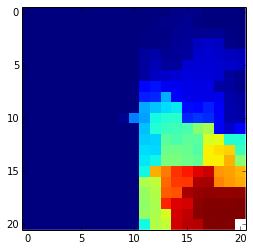

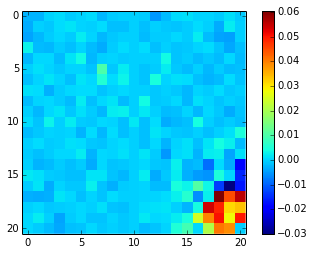

experience 1664
prob [ 0.00057568  0.00057568  0.00057216 ...,  0.00087743  0.00059565
  0.00059565] max_prob 0.00109188084772
[(13, 11), (9, 9), (14, 5), (20, 5), (18, 0), (4, 2), (13, 6), (1, 14), (14, 20), (9, 0), (12, 17), (4, 8), (3, 15), (0, 12), (15, 1), (12, 15), (5, 3), (16, 4), (0, 5), (8, 4), (3, 18), (6, 20), (20, 16), (4, 17), (2, 20), (15, 13), (13, 11), (10, 8), (11, 2), (3, 19), (20, 6), (14, 13), (13, 6), (14, 4), (4, 9), (11, 1), (4, 2), (3, 3), (7, 5), (13, 17), (7, 2), (5, 12), (18, 19), (2, 17), (4, 15), (4, 4), (2, 20), (20, 18), (0, 8), (7, 2), (14, 3), (16, 0), (9, 14), (6, 11), (18, 4), (12, 7), (15, 15), (1, 5), (14, 1), (0, 14), (1, 6), (3, 13), (8, 11), (4, 2), (6, 4), (18, 20), (14, 4), (6, 3), (19, 8), (11, 20), (15, 15), (1, 7), (5, 19), (7, 15), (13, 5), (2, 11), (18, 14), (6, 13), (11, 19), (8, 18), (5, 2), (16, 12), (4, 14), (19, 2), (6, 8), (7, 3), (14, 9), (19, 20), (10, 7), (12, 17), (12, 14), (1, 3), (19, 9), (7, 15), (11, 9), (1, 19), (11, 2), (7,

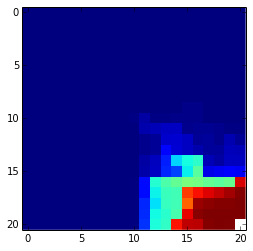

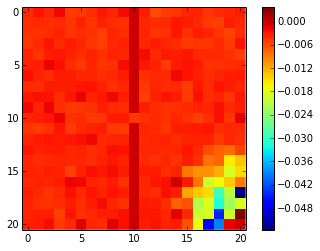

experience 1666
prob [ 0.00059695  0.00059789  0.00060629 ...,  0.00061246  0.00062166
  0.00062166] max_prob 0.000646035150781
[(6, 6), (5, 19), (5, 8), (15, 12), (11, 2), (0, 7), (1, 8), (0, 11), (15, 2), (0, 0), (9, 1), (7, 18), (12, 18), (1, 6), (13, 6), (7, 19), (12, 14), (3, 1), (6, 9), (18, 13), (10, 20), (2, 12), (12, 20), (13, 15), (3, 16), (8, 7), (17, 3), (15, 8), (6, 7), (18, 18), (2, 9), (10, 19), (1, 1), (20, 13), (9, 1), (14, 9), (12, 17), (19, 7), (17, 17), (18, 16), (9, 7), (17, 6), (1, 8), (18, 3), (7, 20), (6, 14), (6, 8), (2, 3), (14, 14), (10, 9), (9, 4), (2, 12), (6, 16), (16, 14), (4, 5), (8, 2), (2, 13), (7, 5), (9, 19), (0, 6), (10, 15), (14, 5), (14, 20), (6, 18), (12, 16), (0, 20), (19, 20), (9, 4), (15, 18), (2, 13), (1, 18), (14, 2), (0, 6), (2, 8), (7, 15), (11, 16), (5, 7), (12, 0), (19, 6), (4, 5), (5, 13), (8, 1), (14, 17), (17, 11), (14, 20), (7, 7), (1, 17), (18, 2), (18, 6), (16, 15), (19, 18), (3, 3), (12, 14), (10, 10), (19, 5), (15, 14), (7, 14), 

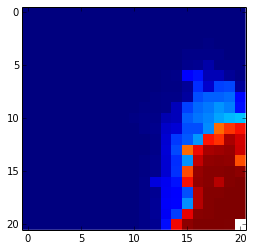

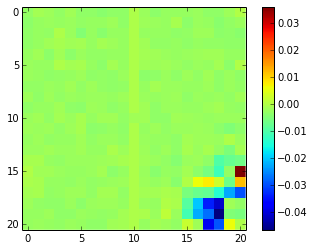

experience 1667
prob [ 0.00059331  0.00059331  0.00059331 ...,  0.00065397  0.00061275
  0.00061275] max_prob 0.000689638714988
[(0, 14), (13, 18), (0, 15), (0, 9), (19, 13), (14, 8), (14, 12), (8, 8), (8, 4), (19, 3), (4, 8), (11, 17), (13, 19), (8, 16), (3, 11), (20, 8), (14, 4), (1, 11), (3, 7), (18, 8), (6, 17), (18, 11), (15, 8), (11, 17), (17, 6), (5, 9), (9, 5), (10, 2), (18, 13), (20, 5), (8, 12), (17, 6), (5, 20), (15, 15), (20, 7), (15, 4), (4, 9), (19, 8), (13, 1), (19, 16), (14, 13), (1, 12), (18, 14), (18, 3), (17, 3), (20, 9), (3, 6), (15, 16), (9, 13), (2, 19), (6, 5), (7, 0), (9, 7), (12, 15), (12, 5), (6, 18), (10, 16), (1, 15), (18, 0), (8, 1), (15, 14), (18, 1), (13, 11), (11, 11), (1, 12), (15, 9), (3, 7), (18, 12), (4, 4), (19, 20), (12, 8), (1, 0), (20, 12), (4, 7), (18, 14), (11, 3), (9, 18), (0, 7), (8, 17), (20, 14), (14, 2), (15, 20), (12, 8), (16, 4), (5, 5), (16, 8), (13, 14), (12, 11), (13, 0), (5, 8), (9, 8), (0, 11), (9, 15), (9, 5), (18, 14), (11, 5), (6

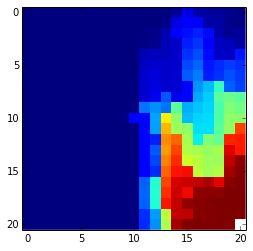

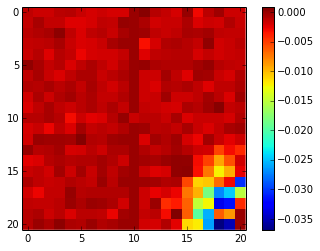

experience 1672
prob [ 0.00060152  0.00060292  0.00060152 ...,  0.00042963  0.00060948
  0.00060948] max_prob 0.000615141774732
[(20, 2), (8, 17), (6, 5), (16, 15), (14, 17), (16, 5), (5, 13), (0, 8), (10, 2), (18, 17), (11, 3), (8, 16), (5, 16), (6, 17), (10, 18), (20, 8), (6, 17), (16, 11), (8, 9), (15, 2), (15, 11), (16, 7), (14, 11), (12, 13), (10, 15), (12, 8), (5, 2), (19, 20), (4, 2), (19, 16), (14, 19), (15, 5), (16, 9), (13, 11), (4, 7), (15, 11), (6, 6), (9, 6), (2, 19), (2, 0), (2, 15), (1, 8), (6, 6), (15, 2), (16, 5), (18, 6), (19, 9), (7, 14), (3, 11), (16, 12), (3, 18), (18, 5), (7, 6), (13, 14), (8, 3), (6, 8), (11, 5), (5, 6), (14, 13), (10, 6), (10, 19), (11, 3), (2, 0), (0, 20), (6, 11), (12, 17), (17, 12), (3, 7), (11, 19), (9, 1), (6, 12), (12, 9), (18, 16), (20, 0), (4, 7), (3, 5), (14, 6), (13, 1), (11, 17), (7, 16), (9, 19), (7, 1), (0, 20), (9, 7), (20, 14), (16, 7), (13, 6), (9, 19), (12, 20), (19, 14), (20, 15), (6, 16), (0, 15), (7, 9), (10, 19), (16, 20), (

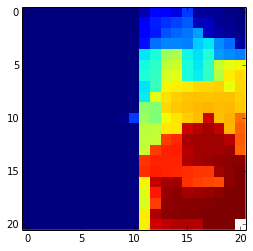

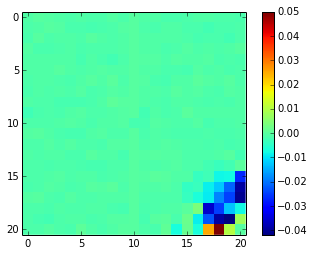

experience 1669
prob [ 0.00060078  0.00059863  0.00060747 ...,  0.00039988  0.000673    0.00060751] max_prob 0.00100127435936
[(17, 1), (14, 3), (1, 0), (0, 4), (9, 20), (15, 8), (7, 12), (19, 18), (4, 2), (15, 6), (4, 15), (18, 2), (13, 18), (15, 3), (1, 12), (9, 16), (10, 5), (19, 6), (1, 3), (10, 19), (2, 3), (5, 14), (12, 20), (10, 19), (1, 4), (11, 17), (10, 2), (20, 2), (7, 12), (6, 12), (0, 18), (15, 5), (10, 15), (17, 16), (5, 16), (3, 5), (6, 4), (3, 17), (18, 11), (3, 19), (13, 4), (16, 19), (9, 0), (13, 18), (10, 1), (8, 7), (20, 4), (9, 20), (1, 7), (17, 18), (11, 6), (3, 6), (10, 14), (14, 18), (6, 6), (9, 4), (9, 7), (18, 9), (6, 15), (0, 3), (15, 18), (2, 16), (9, 0), (6, 14), (3, 8), (17, 4), (13, 18), (8, 16), (16, 3), (12, 7), (10, 5), (1, 13), (17, 17), (16, 9), (3, 6), (3, 1), (13, 6), (4, 20), (5, 13), (13, 11), (5, 13), (5, 14), (7, 12), (1, 14), (2, 14), (15, 12), (3, 8), (11, 5), (2, 8), (7, 11), (10, 8), (13, 14), (1, 15), (14, 9), (5, 2), (4, 6), (7, 20), (19,

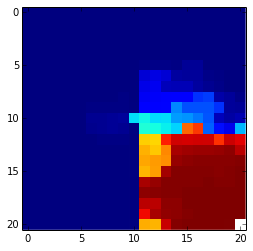

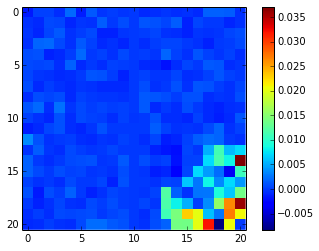

experience 1668
prob [ 0.00059332  0.00059286  0.00059286 ...,  0.00072718  0.00059157
  0.00059157] max_prob 0.000847547256939
[(13, 18), (14, 19), (15, 20), (12, 8), (5, 13), (3, 4), (19, 14), (17, 17), (0, 2), (9, 11), (9, 9), (19, 18), (12, 20), (9, 0), (20, 3), (6, 19), (6, 3), (8, 13), (10, 7), (20, 13), (8, 13), (4, 2), (10, 17), (17, 15), (0, 2), (1, 16), (15, 11), (4, 13), (15, 1), (13, 6), (6, 15), (7, 8), (9, 7), (19, 6), (11, 16), (1, 15), (15, 13), (9, 19), (19, 15), (7, 7), (3, 18), (10, 7), (12, 16), (4, 7), (0, 20), (15, 14), (6, 8), (17, 14), (5, 6), (20, 2), (8, 3), (10, 11), (9, 2), (2, 9), (4, 19), (4, 9), (16, 6), (13, 13), (17, 5), (16, 17), (16, 11), (12, 0), (5, 15), (5, 11), (17, 9), (20, 11), (8, 14), (10, 8), (10, 14), (11, 19), (18, 18), (2, 1), (0, 7), (4, 13), (15, 13), (14, 1), (0, 2), (8, 12), (10, 6), (17, 20), (1, 0), (3, 13), (18, 2), (4, 7), (20, 15), (3, 4), (17, 15), (16, 9), (2, 8), (13, 17), (20, 19), (15, 7), (1, 15), (5, 18), (17, 5), (19, 8), 

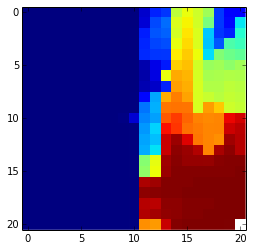

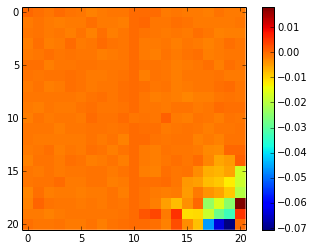

experience 1669
prob [ 0.00060192  0.00060526  0.00060272 ...,  0.00043803  0.00061042
  0.00061042] max_prob 0.000732277402421
[(5, 15), (8, 11), (1, 18), (15, 19), (13, 7), (1, 11), (4, 7), (5, 1), (12, 6), (7, 3), (13, 7), (20, 6), (8, 4), (8, 9), (3, 13), (5, 3), (16, 11), (12, 14), (5, 3), (13, 12), (13, 17), (0, 13), (7, 20), (14, 0), (15, 4), (12, 13), (1, 2), (0, 0), (17, 18), (7, 11), (13, 7), (15, 15), (6, 0), (3, 17), (14, 0), (16, 20), (3, 13), (17, 9), (15, 4), (8, 0), (15, 19), (1, 11), (15, 14), (19, 0), (16, 16), (8, 17), (17, 13), (13, 1), (16, 4), (9, 20), (9, 0), (0, 16), (8, 15), (1, 7), (5, 7), (1, 3), (6, 11), (13, 2), (20, 12), (5, 18), (13, 0), (12, 17), (12, 17), (3, 15), (12, 13), (9, 20), (9, 7), (16, 19), (20, 0), (1, 3), (14, 19), (6, 19), (20, 9), (16, 16), (9, 0), (6, 3), (20, 14), (20, 8), (8, 19), (2, 4), (20, 19), (9, 5), (9, 0), (7, 1), (3, 8), (20, 9), (17, 14), (0, 12), (12, 11), (7, 3), (20, 16), (11, 7), (9, 20), (15, 12), (16, 17), (1, 16), (6, 1

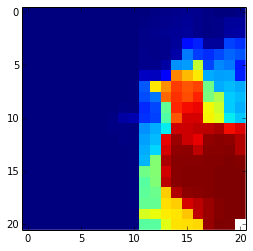

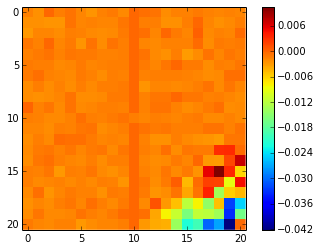

experience 1671
prob [ 0.00059619  0.00059619  0.00060113 ...,  0.00039985  0.00060969
  0.00060969] max_prob 0.000677453982709
[(6, 18), (3, 12), (5, 12), (9, 14), (3, 6), (20, 11), (4, 4), (8, 2), (10, 2), (2, 11), (0, 20), (19, 0), (11, 12), (2, 6), (3, 17), (20, 9), (6, 19), (1, 5), (17, 20), (5, 1), (4, 11), (11, 2), (8, 8), (2, 18), (7, 13), (7, 14), (18, 20), (16, 5), (1, 7), (20, 17), (6, 13), (19, 4), (2, 14), (1, 3), (6, 8), (20, 6), (13, 19), (18, 1), (7, 6), (14, 4), (16, 15), (15, 17), (2, 9), (8, 0), (7, 7), (4, 13), (14, 6), (9, 2), (14, 4), (15, 3), (12, 18), (18, 0), (2, 11), (11, 5), (10, 7), (11, 17), (20, 4), (5, 8), (18, 0), (6, 19), (13, 19), (12, 1), (2, 1), (3, 1), (11, 18), (0, 17), (2, 14), (3, 19), (8, 2), (10, 4), (2, 19), (19, 6), (7, 1), (2, 6), (4, 1), (20, 18), (2, 15), (6, 7), (14, 1), (6, 18), (20, 11), (8, 4), (7, 4), (17, 19), (13, 3), (5, 19), (19, 16), (8, 19), (13, 16), (17, 16), (4, 3), (7, 18), (2, 14), (8, 19), (4, 17), (6, 18), (2, 14), (6, 5)

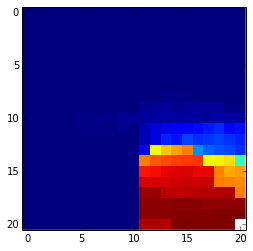

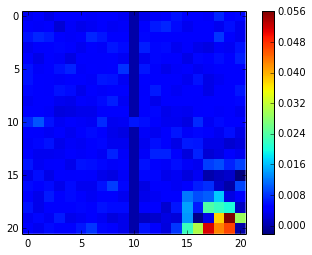

experience 1669
prob [ 0.00059878  0.00059878  0.00059151 ...,  0.00091313  0.00057285
  0.00057285] max_prob 0.00100519902164
[(18, 6), (6, 4), (3, 13), (1, 20), (8, 13), (15, 1), (14, 7), (13, 15), (3, 14), (16, 16), (6, 6), (20, 17), (13, 19), (7, 4), (13, 20), (18, 18), (3, 9), (14, 13), (17, 12), (12, 8), (10, 17), (1, 6), (8, 15), (18, 3), (2, 20), (14, 9), (8, 13), (4, 12), (11, 6), (18, 1), (10, 11), (3, 9), (12, 12), (14, 5), (2, 19), (18, 18), (9, 19), (3, 9), (4, 6), (4, 18), (7, 3), (20, 15), (16, 4), (15, 8), (3, 7), (18, 1), (3, 13), (5, 1), (10, 7), (16, 16), (17, 7), (13, 8), (15, 2), (19, 16), (18, 6), (18, 13), (7, 11), (10, 20), (7, 9), (0, 17), (18, 6), (16, 15), (0, 13), (1, 12), (13, 20), (20, 2), (19, 9), (7, 13), (15, 15), (1, 9), (8, 19), (14, 1), (3, 9), (18, 16), (10, 0), (5, 9), (10, 1), (7, 20), (16, 2), (11, 18), (0, 15), (3, 9), (4, 3), (9, 18), (15, 20), (2, 20), (18, 11), (12, 9), (15, 7), (1, 11), (5, 9), (6, 13), (20, 4), (20, 18), (14, 4), (8, 5), (1

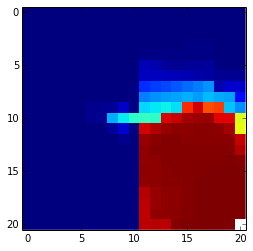

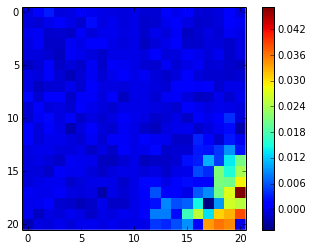

experience 1666
prob [ 0.00059753  0.00060826  0.00058693 ...,  0.0008374   0.00058986
  0.00058986] max_prob 0.000946754442931
[(19, 12), (17, 20), (18, 6), (11, 5), (3, 2), (1, 17), (11, 6), (13, 18), (10, 16), (7, 7), (16, 5), (19, 11), (9, 15), (0, 20), (7, 2), (20, 7), (5, 8), (10, 10), (16, 4), (3, 17), (9, 15), (20, 11), (15, 19), (4, 7), (12, 12), (0, 1), (14, 12), (17, 1), (1, 20), (1, 18), (13, 18), (15, 6), (4, 6), (3, 19), (2, 6), (7, 20), (13, 11), (19, 17), (18, 19), (10, 10), (0, 12), (10, 9), (9, 3), (12, 14), (3, 1), (20, 0), (11, 9), (2, 18), (0, 1), (6, 18), (0, 18), (5, 19), (8, 7), (16, 5), (6, 11), (14, 5), (17, 0), (7, 12), (1, 12), (1, 13), (9, 17), (20, 18), (0, 1), (4, 16), (19, 16), (20, 18), (14, 6), (7, 16), (5, 7), (4, 19), (13, 6), (20, 2), (8, 15), (2, 0), (10, 13), (14, 7), (17, 18), (18, 12), (18, 14), (9, 15), (13, 15), (4, 11), (18, 15), (2, 5), (13, 8), (17, 12), (2, 2), (16, 17), (11, 17), (7, 2), (12, 7), (19, 4), (4, 18), (12, 13), (4, 3), (15, 3

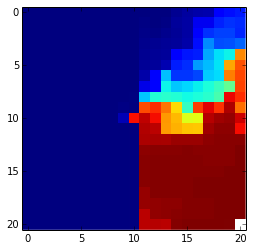

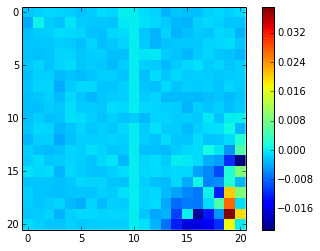

experience 1666
prob [ 0.00059898  0.00060301  0.00059898 ...,  0.00072375  0.00060958
  0.00060958] max_prob 0.000901264499539
[(15, 14), (9, 20), (6, 11), (5, 12), (19, 12), (18, 4), (2, 5), (6, 9), (7, 20), (14, 0), (3, 14), (6, 3), (0, 7), (20, 3), (16, 19), (3, 18), (0, 17), (14, 4), (4, 3), (1, 8), (11, 9), (3, 14), (3, 11), (20, 6), (6, 14), (18, 0), (20, 13), (20, 16), (0, 13), (11, 2), (4, 13), (5, 1), (10, 1), (17, 19), (11, 14), (2, 5), (18, 19), (8, 9), (11, 1), (2, 7), (6, 7), (8, 8), (5, 9), (13, 18), (8, 3), (13, 3), (7, 18), (20, 7), (20, 16), (20, 3), (14, 7), (12, 17), (7, 2), (19, 7), (5, 2), (17, 17), (20, 6), (5, 12), (7, 5), (20, 12), (9, 3), (2, 4), (1, 12), (5, 8), (16, 13), (0, 18), (0, 15), (3, 14), (10, 19), (11, 18), (7, 5), (1, 12), (1, 4), (19, 20), (15, 17), (3, 12), (11, 8), (14, 8), (4, 13), (6, 4), (1, 3), (18, 1), (14, 8), (9, 20), (3, 11), (17, 17), (19, 8), (18, 19), (17, 6), (13, 6), (16, 2), (7, 1), (14, 3), (4, 7), (7, 3), (1, 12), (10, 12), (8, 

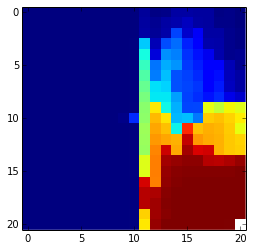

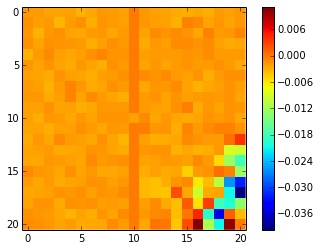

experience 1671
prob [ 0.00060022  0.00060357  0.00060161 ...,  0.00061091  0.00067826
  0.00061091] max_prob 0.000683258215469
[(2, 18), (9, 14), (16, 2), (11, 11), (20, 16), (13, 4), (0, 12), (16, 2), (14, 3), (4, 14), (14, 17), (17, 6), (15, 7), (6, 15), (0, 1), (19, 9), (7, 18), (20, 14), (15, 4), (18, 9), (2, 19), (3, 9), (1, 5), (13, 0), (0, 20), (18, 6), (20, 16), (10, 2), (2, 6), (4, 8), (15, 3), (15, 1), (17, 1), (19, 9), (15, 8), (10, 0), (14, 19), (8, 4), (12, 12), (11, 5), (16, 19), (1, 12), (7, 15), (19, 4), (6, 20), (1, 12), (17, 18), (20, 7), (7, 4), (17, 5), (16, 9), (6, 13), (10, 7), (3, 0), (3, 2), (17, 5), (13, 5), (7, 15), (17, 0), (0, 6), (15, 13), (19, 2), (3, 0), (5, 6), (10, 0), (9, 11), (16, 12), (3, 8), (8, 18), (6, 6), (12, 7), (6, 15), (20, 8), (1, 9), (15, 15), (6, 13), (2, 4), (8, 6), (18, 7), (14, 20), (17, 11), (8, 3), (5, 13), (16, 1), (7, 13), (17, 16), (3, 19), (19, 13), (8, 6), (9, 14), (17, 19), (20, 15), (4, 18), (10, 19), (18, 19), (1, 11), (5, 20

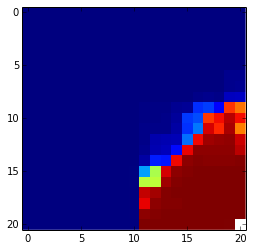

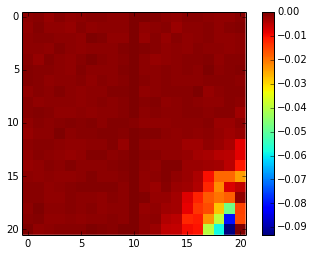

experience 1666
prob [ 0.00060812  0.00060668  0.0006123  ...,  0.00024218  0.00061476
  0.00061476] max_prob 0.000615807218424
[(16, 2), (11, 11), (15, 14), (16, 6), (6, 9), (7, 12), (17, 14), (2, 0), (4, 7), (16, 9), (8, 18), (17, 0), (2, 18), (20, 5), (16, 5), (6, 18), (13, 18), (1, 15), (6, 17), (2, 4), (18, 3), (5, 13), (0, 5), (16, 17), (4, 13), (14, 20), (0, 5), (6, 0), (3, 13), (2, 13), (8, 15), (8, 12), (15, 1), (15, 5), (10, 10), (14, 19), (1, 6), (4, 1), (14, 20), (7, 5), (12, 3), (0, 14), (9, 4), (0, 13), (0, 9), (9, 12), (4, 17), (14, 19), (6, 12), (7, 2), (2, 5), (13, 3), (1, 11), (8, 2), (20, 17), (5, 0), (1, 0), (2, 2), (13, 14), (8, 16), (4, 16), (15, 4), (0, 15), (11, 5), (16, 5), (15, 20), (7, 15), (7, 18), (14, 9), (9, 4), (14, 20), (17, 1), (12, 5), (19, 6), (10, 8), (13, 15), (16, 17), (11, 1), (12, 15), (17, 2), (12, 18), (11, 4), (14, 4), (19, 5), (9, 12), (3, 17), (4, 13), (14, 1), (13, 19), (14, 3), (13, 18), (1, 19), (20, 8), (20, 7), (4, 16), (10, 12), (6, 3

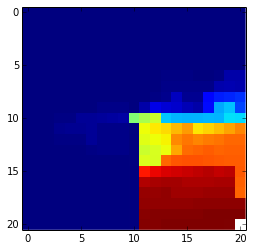

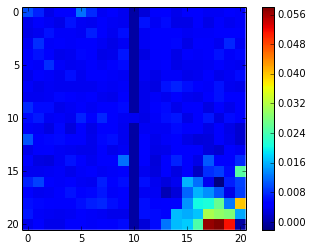

experience 1673
prob [ 0.000613    0.00058819  0.000613   ...,  0.00066388  0.00056885
  0.00056885] max_prob 0.0010175167031
[(19, 5), (6, 11), (6, 1), (16, 16), (9, 2), (2, 17), (0, 16), (7, 1), (12, 12), (16, 17), (11, 8), (8, 7), (18, 14), (8, 19), (2, 16), (6, 5), (13, 15), (3, 17), (16, 8), (4, 3), (7, 15), (2, 20), (12, 11), (3, 15), (2, 5), (17, 4), (12, 13), (15, 14), (15, 2), (12, 9), (14, 1), (1, 9), (4, 19), (20, 17), (6, 4), (7, 13), (16, 6), (4, 11), (4, 14), (6, 20), (20, 9), (17, 15), (0, 11), (7, 12), (9, 6), (20, 18), (14, 1), (19, 4), (18, 19), (2, 17), (15, 12), (18, 17), (14, 0), (10, 15), (6, 1), (17, 0), (11, 3), (14, 9), (9, 1), (7, 4), (1, 5), (8, 6), (15, 20), (11, 13), (15, 6), (5, 11), (16, 2), (6, 12), (10, 3), (3, 3), (0, 0), (18, 3), (7, 0), (5, 16), (0, 16), (0, 1), (1, 8), (2, 0), (17, 16), (11, 9), (18, 13), (2, 7), (8, 5), (17, 8), (1, 13), (11, 14), (19, 16), (5, 3), (3, 15), (10, 14), (0, 15), (13, 3), (17, 17), (14, 17), (10, 6), (7, 15), (18, 9), 

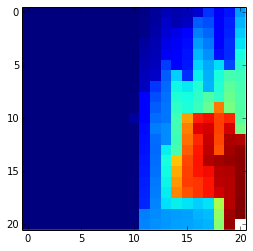

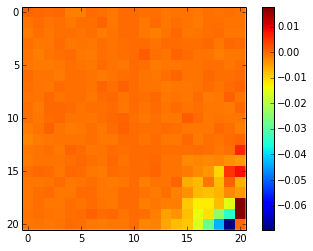

experience 1668
prob [ 0.00060168  0.00059783  0.0006031  ...,  0.00039395  0.00060648
  0.00060648] max_prob 0.00072489989561
[(15, 4), (19, 13), (3, 1), (18, 8), (15, 20), (12, 14), (17, 4), (14, 20), (7, 3), (14, 0), (2, 18), (11, 14), (20, 4), (16, 5), (0, 15), (20, 14), (2, 5), (10, 6), (14, 5), (15, 4), (2, 6), (19, 7), (10, 20), (9, 6), (0, 19), (15, 7), (3, 8), (16, 14), (4, 14), (5, 2), (4, 13), (19, 9), (14, 6), (12, 9), (0, 16), (16, 8), (1, 20), (8, 17), (20, 17), (5, 19), (5, 14), (16, 15), (17, 8), (20, 7), (20, 18), (20, 14), (2, 13), (5, 13), (11, 15), (10, 11), (3, 18), (2, 18), (5, 19), (5, 13), (16, 11), (20, 2), (4, 16), (20, 2), (5, 7), (9, 12), (15, 15), (17, 14), (3, 20), (10, 6), (0, 9), (1, 2), (17, 12), (17, 1), (4, 16), (4, 0), (6, 8), (17, 14), (19, 20), (9, 13), (2, 4), (11, 14), (2, 18), (5, 20), (9, 19), (7, 20), (17, 0), (7, 5), (9, 9), (10, 12), (9, 13), (17, 11), (10, 11), (4, 20), (17, 17), (7, 4), (9, 9), (11, 12), (16, 20), (3, 19), (6, 20), (17, 17

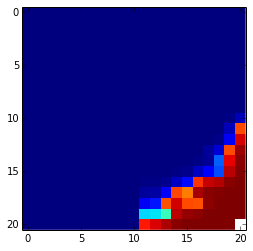

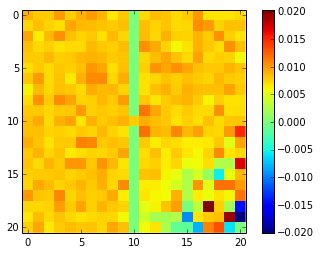

experience 1671
prob [ 0.00061883  0.00060936  0.00060936 ...,  0.00046267  0.00046267
  0.0005652 ] max_prob 0.000685889863765
[(14, 3), (0, 3), (14, 11), (2, 11), (14, 19), (19, 2), (20, 14), (20, 9), (14, 16), (14, 0), (17, 20), (6, 2), (11, 12), (1, 9), (10, 9), (16, 3), (10, 13), (4, 15), (8, 17), (18, 14), (3, 11), (19, 17), (5, 19), (17, 20), (13, 6), (12, 12), (9, 6), (17, 5), (13, 11), (17, 11), (13, 3), (15, 0), (7, 14), (14, 16), (6, 0), (9, 12), (2, 13), (14, 3), (4, 1), (5, 11), (19, 20), (4, 15), (1, 7), (20, 18), (12, 11), (14, 13), (18, 11), (10, 5), (2, 3), (17, 7), (15, 17), (11, 3), (7, 7), (10, 16), (12, 14), (12, 7), (19, 19), (10, 18), (20, 12), (8, 13), (1, 18), (19, 17), (16, 13), (13, 11), (2, 2), (13, 6), (9, 1), (16, 1), (6, 19), (18, 14), (18, 19), (15, 12), (8, 15), (1, 13), (20, 4), (0, 20), (9, 19), (4, 16), (20, 18), (14, 11), (6, 13), (12, 6), (3, 18), (15, 16), (1, 4), (7, 16), (7, 8), (4, 1), (2, 0), (7, 18), (1, 13), (7, 11), (14, 0), (19, 14), (10, 

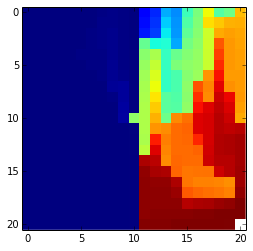

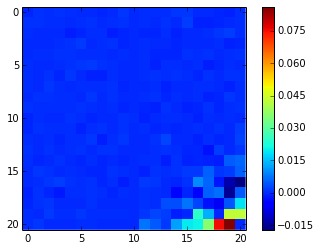

experience 1670
prob [ 0.0005937   0.0005939   0.00058877 ...,  0.00139821  0.0005902   0.0005902 ] max_prob 0.00139821136274
[(2, 15), (20, 16), (4, 9), (3, 8), (18, 2), (15, 11), (10, 1), (9, 5), (3, 9), (12, 3), (16, 15), (17, 4), (3, 19), (0, 11), (9, 20), (2, 15), (20, 15), (20, 2), (0, 5), (2, 20), (6, 11), (2, 8), (9, 14), (16, 4), (1, 6), (10, 5), (13, 0), (3, 5), (14, 17), (12, 16), (12, 15), (14, 6), (18, 19), (15, 7), (11, 4), (11, 16), (11, 1), (1, 19), (12, 17), (20, 2), (16, 15), (14, 8), (10, 16), (13, 1), (17, 14), (12, 4), (13, 12), (20, 0), (3, 12), (11, 17), (20, 5), (17, 20), (10, 17), (19, 11), (4, 17), (8, 0), (0, 17), (19, 11), (1, 3), (13, 17), (15, 2), (11, 3), (18, 6), (5, 12), (2, 17), (12, 17), (13, 1), (6, 2), (16, 3), (14, 19), (11, 18), (5, 13), (10, 13), (10, 20), (14, 6), (9, 5), (16, 8), (2, 2), (12, 15), (7, 20), (16, 8), (9, 14), (3, 9), (20, 15), (16, 15), (3, 0), (18, 1), (16, 6), (5, 1), (11, 4), (19, 15), (14, 20), (5, 13), (4, 6), (2, 4), (16, 4

In [313]:
dqn = DQN(task, two_layer_arch)
learner = AdaDeepQlearn(task, dqn, tau=1.0, lr=1e-3)

scores = []
for it in range(100):
    learner.run(num_epochs=1, budget=3)
    if it % 5 == 0:
        print 'it', it
        plt.imshow(reward_tabular_normalized(dqn, task, tol=1e-2).reshape((21, 21)), interpolation='none', vmin=0., vmax=1.)
        scores.append(expected_reward_tabular_normalized(dqn, task, tol=1e-2))
        showIs(learner, task)
        plt.colorbar()
        plt.show()
        

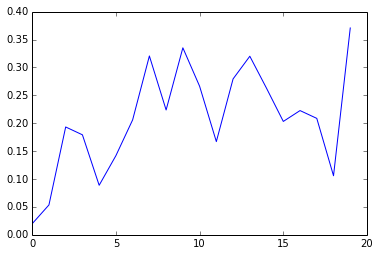

In [314]:
plot(scores)